# Imports and Initial Setup

In [2]:
# Importing libraries for Numerical and Data Analysis.
import pandas as pd
import numpy as np

# Importing libraries for Data Visualization.
import seaborn as sns
import matplotlib.pyplot as plt
import plotly

import datetime as dt
import warnings

# Setting max rows settings to 200 to display all the summary data
pd.set_option("display.max_rows", 50)

# Suppress warnings
warnings.filterwarnings('ignore')

# Load Data from CSV files.

In [3]:
loan = pd.read_csv('loan.csv', low_memory=False)
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# Data Understanding

In [4]:
# Loading all data dictionary values
dict = pd.read_excel('Data_Dictionary.xlsx')
dict

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
...,...,...
112,verification_status,"Indicates if income was verified by LC, not ve..."
113,verified_status_joint,Indicates if the co-borrowers' joint income wa...
114,zip_code,The first 3 numbers of the zip code provided b...
115,NaN,NaN


In [5]:
loan.shape

(39717, 111)

# Data Cleaning and Manipulation

In [6]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [7]:
loan.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [8]:
# Percentage of missing values.
# Indentification of Missing Values.
loan.isna().sum() / loan.shape[0] * 100

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

### Strategy: 
##### (a) Columns having high percentage of missing values (>40% or 50%), directly discard that column from the analysis. 
##### (b) Columns having missing values under acceptable range we prefer to impute them (replace with some values) 
##### (c) For numerical columns we prefer to use mean or median.(Median is preferred) 
##### (d) Median is not affected with the outliers. (Extreme values) 
##### (e) For categorical columns we prefer to use mode.

In [9]:
loan_master_data = loan.drop(['tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 
                      'total_il_high_credit_limit', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 
                      'percent_bc_gt_75', 'num_tl_120dpd_2m', 'num_tl_30dpd', 
                      'num_tl_90g_dpd_24m', 'num_rev_accts', 'num_rev_tl_bal_gt_0',  
                      'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 
                      'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 
                      'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 
                      'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 
                      'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 
                      'mo_sin_old_il_acct', 'bc_util', 'num_sats', 
                      'bc_open_to_buy', 'avg_cur_bal', 'acc_open_past_24mths', 
                      'inq_last_12m', 'inq_last_12m', 'total_cu_tl', 
                      'inq_fi', 'total_rev_hi_lim', 'all_util', 
                      'max_bal_bc', 'open_rv_24m', 'open_rv_12m', 
                      'il_util', 'total_bal_il', 'mths_since_rcnt_il', 
                      'open_il_24m', 'open_il_12m', 'open_il_6m', 
                      'open_acc_6m', 'tot_cur_bal', 'tot_coll_amt'], axis=1)
print(loan_master_data.isna().sum() / loan_master_data.shape[0] * 100)
print("Shape of new df : ", loan_master_data.shape)
print("Number of columns dropped : ", loan.shape[1] - loan_master_data.shape[1])

id                          0.000000
member_id                   0.000000
loan_amnt                   0.000000
funded_amnt                 0.000000
funded_amnt_inv             0.000000
                              ...   
acc_now_delinq              0.000000
chargeoff_within_12_mths    0.140998
delinq_amnt                 0.000000
pub_rec_bankruptcies        1.754916
tax_liens                   0.098195
Length: 61, dtype: float64
Shape of new df :  (39717, 61)
Number of columns dropped :  50


##### **Percent of missing values columnwise.**

In [10]:
missing_values = round(100*(loan_master_data.isnull().sum()/len(loan_master_data.id)), 2)
missing_values.loc[missing_values > 0]

emp_title                        6.19
emp_length                       2.71
desc                            32.59
title                            0.03
mths_since_last_delinq          64.66
mths_since_last_record          92.99
revol_util                       0.13
last_pymnt_d                     0.18
next_pymnt_d                    97.13
last_credit_pull_d               0.01
collections_12_mths_ex_med       0.14
mths_since_last_major_derog    100.00
annual_inc_joint               100.00
dti_joint                      100.00
verification_status_joint      100.00
chargeoff_within_12_mths         0.14
pub_rec_bankruptcies             1.75
tax_liens                        0.10
dtype: float64

In [11]:
columns_with_missing_values = list(missing_values[missing_values >= 50].index)

print("Number of columns with missing values more than 50% : ", len(columns_with_missing_values))

Number of columns with missing values more than 50% :  7


In [12]:
loan_master_data = loan_master_data.drop(columns_with_missing_values,axis=1)
loan_master_data.shape

(39717, 54)

In [13]:
missing = round(100*(loan_master_data.isnull().sum()/len(loan_master_data.id)), 2)
missing[missing != 0]

emp_title                      6.19
emp_length                     2.71
desc                          32.59
title                          0.03
revol_util                     0.13
last_pymnt_d                   0.18
last_credit_pull_d             0.01
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
pub_rec_bankruptcies           1.75
tax_liens                      0.10
dtype: float64

**Removing 'desc' as a similar type of info is present in 'title' column.**

In [14]:
loan_master_data = loan_master_data.drop('desc', axis=1)
loan_master_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [15]:
Null_values_in_percent = round(100*(loan_master_data.isnull().sum()/len(loan_master_data.id)), 2)
Null_values_in_percent[Null_values_in_percent != 0]

emp_title                     6.19
emp_length                    2.71
title                         0.03
revol_util                    0.13
last_pymnt_d                  0.18
last_credit_pull_d            0.01
collections_12_mths_ex_med    0.14
chargeoff_within_12_mths      0.14
pub_rec_bankruptcies          1.75
tax_liens                     0.10
dtype: float64

**After dropping the unnecessary columns lets remove NULL values.**

In [16]:
# Check for unique values in each columns.
loan_master_data.nunique()

id                          39717
member_id                   39717
loan_amnt                     885
funded_amnt                  1041
funded_amnt_inv              8205
                            ...  
acc_now_delinq                  1
chargeoff_within_12_mths        1
delinq_amnt                     1
pub_rec_bankruptcies            3
tax_liens                       1
Length: 53, dtype: int64

In [17]:
print("emp_title : ", len(loan_master_data.emp_title.unique()))
print("emp_length : ", len(loan_master_data.emp_length.unique()))
print("title : ", len(loan_master_data.title.unique()))
print("revol_util : ", len(loan_master_data.revol_util.unique()))
print("last_pymnt_d : ", len(loan_master_data.last_pymnt_d.unique()))
print("last_credit_pull_d : ", len(loan_master_data.last_credit_pull_d.unique()))
print("collections_12_mths_ex_med : ", len(loan_master_data.collections_12_mths_ex_med.unique()))
print("chargeoff_within_12_mths : ", len(loan_master_data.chargeoff_within_12_mths.unique()))
print("pub_rec_bankruptcies : ", len(loan_master_data.pub_rec_bankruptcies.unique()))
print("tax_liens : ", len(loan_master_data.tax_liens.unique()))

emp_title :  28821
emp_length :  12
title :  19616
revol_util :  1090
last_pymnt_d :  102
last_credit_pull_d :  107
collections_12_mths_ex_med :  2
chargeoff_within_12_mths :  2
pub_rec_bankruptcies :  4
tax_liens :  2


In [18]:
print(loan_master_data.emp_length.unique())
print(loan_master_data.collections_12_mths_ex_med.unique())           
print(loan_master_data.chargeoff_within_12_mths.unique())             
print(loan_master_data.pub_rec_bankruptcies.unique())
print(loan_master_data.tax_liens.unique())                           

['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]
[ 0. nan]
[ 0. nan]
[ 0.  1.  2. nan]
[ 0. nan]


#### **Droppping more columns less impact values (since only values are 0 or nan).**

In [19]:
loan_master_data = loan_master_data.drop(['collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens'],axis=1)
loan_master_data.shape

(39717, 50)

In [20]:
Null_values_in_percent = round(100*(loan_master_data.isnull().sum()/len(loan_master_data.id)), 2)
Null_values_in_percent[Null_values_in_percent != 0]

emp_title               6.19
emp_length              2.71
title                   0.03
revol_util              0.13
last_pymnt_d            0.18
last_credit_pull_d      0.01
pub_rec_bankruptcies    1.75
dtype: float64

#### **Remove rows with NULL values.**

In [21]:
loan_master_data=loan_master_data[~loan_master_data.pub_rec_bankruptcies.isnull()]
loan_master_data=loan_master_data[~loan_master_data.emp_title.isnull()]
loan_master_data=loan_master_data[~loan_master_data.emp_length.isnull()]
loan_master_data=loan_master_data[~loan_master_data.title.isnull()]
loan_master_data=loan_master_data[~loan_master_data.revol_util.isnull()]
loan_master_data=loan_master_data[~loan_master_data.last_pymnt_d.isnull()]

In [22]:
Null_values_in_percent = round(100*(loan_master_data.isnull().sum()/len(loan_master_data.id)), 2)
Null_values_in_percent[Null_values_in_percent != 0]

Series([], dtype: float64)

In [23]:
loan_master_data.shape

(36433, 50)

#### **Analyse if more columns can be removed.**

In [24]:
# List of unique values present based on unique values present in the dataset.
loan_master_data.nunique().sort_values()

acc_now_delinq                 1
application_type               1
policy_code                    1
initial_list_status            1
delinq_amnt                    1
pymnt_plan                     1
term                           2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
home_ownership                 4
pub_rec                        5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       14
sub_grade                     35
open_acc                      38
addr_state                    49
issue_d                       52
total_acc                     79
last_credit_pull_d            96
last_pymnt_d                  97
int_rate                     334
earliest_cr_line             510
zip_code                     806
loan_amnt                    863
funded_amnt                 1024
out_prncp                   1064
out_prncp_

**Based on data provided in data dictionary, there are few columns having a single unique value or all unique values. As they have nothing to contribute to our analysis, we can drop those columns.**

| Columns to be dropped |  | Reason |
| --- | --- | --- |
| 1. id |  | Its a random generated number, doesn't contribute to analysis. |
| 2. member_id |  | Its a random generated number, doesn't contribute to analysis. |
| 3. url |  | Non-relevant to loan defaulters analysis. |
| 4. zip_code |  | incomplete zipcode. |
| 5. acc_now_delinq |  | all values 0. |
| 6. application_type |  | all values 'INDIVIDUAL'. |
| 7. policy_code |  | all values are 1. |
| 8. initial_list_status |  | all values are f. |
| 9. delinq_amnt |  | all values 0. |
| 10. pymnt_plan |  | all values n. |

Dropping all 10 non-relevant columns.

In [25]:
loan_master_data = loan_master_data.drop(['id', 'member_id', 'url', 'zip_code', 
                          'acc_now_delinq', 'application_type', 'policy_code', 'initial_list_status', 
                          'delinq_amnt', 'pymnt_plan'],axis=1)
loan_master_data.shape

(36433, 40)

### **Standardising Values**

**Convert column with datetime values to proper format.**

In [26]:
cols_with_date = ['last_pymnt_d', 'last_credit_pull_d', 'earliest_cr_line', 'issue_d']
for date in cols_with_date:
    loan_master_data[date] = pd.to_datetime(loan_master_data[date], format='%b-%y')

**Convert column with percent values to float.**

In [27]:
loan_master_data.int_rate.describe()

count      36433
unique       334
top       10.99%
freq         901
Name: int_rate, dtype: object

In [28]:
loan_master_data.revol_util.describe()

count     36433
unique     1082
top          0%
freq        852
Name: revol_util, dtype: object

In [29]:
cols_with_date = ['int_rate', 'revol_util']
for cols in cols_with_date:
    loan_master_data[cols] = loan_master_data[cols].astype(str).str.rstrip('%')
    loan_master_data[cols] = loan_master_data[cols].astype(float)

In [30]:
loan_master_data.int_rate.describe()
loan_master_data.revol_util.describe()

count    36433.000000
mean        49.276251
std         28.191811
min          0.000000
25%         26.100000
50%         49.900000
75%         72.700000
max         99.900000
Name: revol_util, dtype: float64

**Convert column with string values to integer(wherever possible). Like we can remove months from 'terms' columns.**

In [31]:
def extract_number(value):
  return int(value.replace(' months', ''))

loan_master_data['term'] = loan_master_data['term'].apply(extract_number)

In [32]:
loan_master_data.term.describe()

count    36433.000000
mean        42.624324
std         10.728712
min         36.000000
25%         36.000000
50%         36.000000
75%         60.000000
max         60.000000
Name: term, dtype: float64

In [33]:
loan_master_data.emp_length.value_counts()

emp_length
10+ years    8407
2 years      4178
< 1 year     4052
3 years      3914
4 years      3297
5 years      3129
1 year       3026
6 years      2121
7 years      1697
8 years      1405
9 years      1207
Name: count, dtype: int64

**Let's convert the 'emp_lenth' column to a numerical scale ranging from 0 to 10, by mapping the text values to their corresponding numeric values.**

In [34]:
# Create a mapping dictionary
emp_length_mapping = {
    '< 1 year'  : 0,
    '1 year'    : 1,
    '2 years'   : 2,
    '3 years'   : 3,
    '4 years'   : 4,
    '5 years'   : 5,
    '6 years'   : 6,
    '7 years'   : 7,
    '8 years'   : 8,
    '9 years'   : 9,
    '10+ years' : 10
}

loan_master_data = loan_master_data.replace({"emp_length": emp_length_mapping })

In [35]:
print(loan_master_data.emp_length.value_counts())
print(loan_master_data.emp_length.dtypes)

emp_length
10    8407
2     4178
0     4052
3     3914
4     3297
5     3129
1     3026
6     2121
7     1697
8     1405
9     1207
Name: count, dtype: int64
int64


**Lets split the available date in year and month.**

In [36]:
loan_master_data['earliest_cr_line_month'] = loan_master_data['earliest_cr_line'].dt.month
loan_master_data['earliest_cr_line_year'] = loan_master_data['earliest_cr_line'].dt.year
loan_master_data['issue_d_month'] = loan_master_data['issue_d'].dt.month
loan_master_data['issue_d_year'] = loan_master_data['issue_d'].dt.year

**Let's check, if there exists entries after the year 2011 too.**

In [37]:
len(loan_master_data[loan_master_data['earliest_cr_line_year'] > 2011 ])
loan_master_data[loan_master_data['earliest_cr_line_year'] > 2011 ]['earliest_cr_line_year'].unique()


array([2068, 2067, 2065, 2063, 2066, 2062, 2056, 2046, 2050, 2064, 2054],
      dtype=int32)

**This seems to be a result of y2k like error. Year stored in two digits being interpreted as year in 21st century. Let's fix the entries.**

In [39]:
loan_master_data.loc[loan_master_data['earliest_cr_line_year'] > 2011 , 'earliest_cr_line_year'] = loan_master_data['earliest_cr_line_year'] - 100

In [40]:
loan_master_data.groupby('earliest_cr_line_year').loan_amnt.count()

earliest_cr_line_year
1946       1
1950       1
1954       1
1956       1
1962       3
        ... 
2004    1639
2005    1406
2006    1079
2007     668
2008     144
Name: loan_amnt, Length: 51, dtype: int64

## Analysis

In [41]:
loan_master_data.loan_status.value_counts()

loan_status
Fully Paid     30424
Charged Off     4943
Current         1066
Name: count, dtype: int64

##### **We can ignore 'Current' loan,  since we only need to understand the difference between loans that have been 'Fully Paid' or 'Charged Off'.**

In [42]:
loan_master_data = loan_master_data[loan_master_data['loan_status'].isin(['Fully Paid', 'Charged Off'])]

In [43]:
loan_master_data.loan_status.value_counts()
loan_master_data.shape

(35367, 44)

## Segmentation

In [44]:
loan_master_data.nunique()

loan_amnt                    847
funded_amnt                 1001
funded_amnt_inv             7326
term                           2
int_rate                     334
installment                14028
grade                          7
sub_grade                     35
emp_title                  27414
emp_length                    11
home_ownership                 4
annual_inc                  4831
verification_status            3
issue_d                       52
loan_status                    2
purpose                       14
title                      17662
addr_state                    49
dti                         2842
delinq_2yrs                   11
earliest_cr_line             509
inq_last_6mths                 9
open_acc                      38
pub_rec                        5
revol_bal                  20351
revol_util                  1081
total_acc                     79
out_prncp                      1
out_prncp_inv                  1
total_pymnt                33740
total_pymn

## UNIVARIATE AND SEGMENTED UNIVARIATE ANALYSIS

In [45]:
def showLabels(ax, d=None):
    plt.margins(0.2, 0.2)
    rects = ax.patches
    i = 0
    locs, labels = plt.xticks() 
    counts = {}
    if not d is None:
        for key, value in d.items():
            counts[str(key)] = value

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        if d is None:
            label = "{:.1f}".format(y_value)
        else:
            try:
                label = "{:.1f}".format(y_value) + "\nof " + str(counts[str(labels[i].get_text())])
            except:
                label = "{:.1f}".format(y_value)
        
        i = i+1

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

In [46]:
# This function plots a given column buckets against loan_status (default = 'Charged Off'). The plots are in percentages.
def plot_loan_status_percentage(dataframe, grouping_column, loanstatus='Charged Off'):
    grp = dataframe.groupby(['loan_status',grouping_column])[grouping_column].count()
    cnt = dataframe.groupby(grouping_column)[grouping_column].count()
    percentages = grp.unstack() * 100 / cnt.T
    ax = percentages.loc[loanstatus].plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% of loans ' + loanstatus)
    showLabels(ax, grp[loanstatus].to_dict())
    plt.margins(0.2, 0.2)
    plt.tight_layout()
    return ax

In [47]:
# This method plots a distribution of target column, and its boxplot against loan_status column
def plot_distribution(dataframe, col):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    ax = sns.distplot(dataframe[col])
    plt.subplot(1, 2, 2)
    sns.boxplot(x=dataframe[col], y=dataframe['loan_status'], data=dataframe)
    plt.show()

In [48]:
# This method prints two plots side grouping_column side 
# Left one is percentage of a categorical variable in the entire dataset 
# Right one is percentage for Charged Off loans 
# Significant changes in percentage from left to right can indicate a value of interest
def plot_percentages(dataframe, grouping_column, sortbyindex=False):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    values = (loan_master_data[grouping_column].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% in dataset', fontsize=16)
    ax.set_xlabel(grouping_column, fontsize=12)
    showLabels(ax)
    plt.subplot(1, 2, 2)
    values = (loan_master_data.loc[loan_master_data['loan_status']=='Charged Off'][grouping_column].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% in Charged Off loans', fontsize=16)
    showLabels(ax)

In [49]:
# This method plots a categorical bar plots of target column
def barPlotsForCategoricalData(dataframe, arr):
    rows = int(len(arr)/2)
    for idx, val in enumerate(arr, start=1):
        plt.subplot(rows, 2, idx)
        ax = dataframe.groupby(val).loan_amnt.count().plot.bar(color=sns.color_palette('husl', 16))
        showLabels(ax)

    plt.tight_layout()

### 1. Variable: loan_status

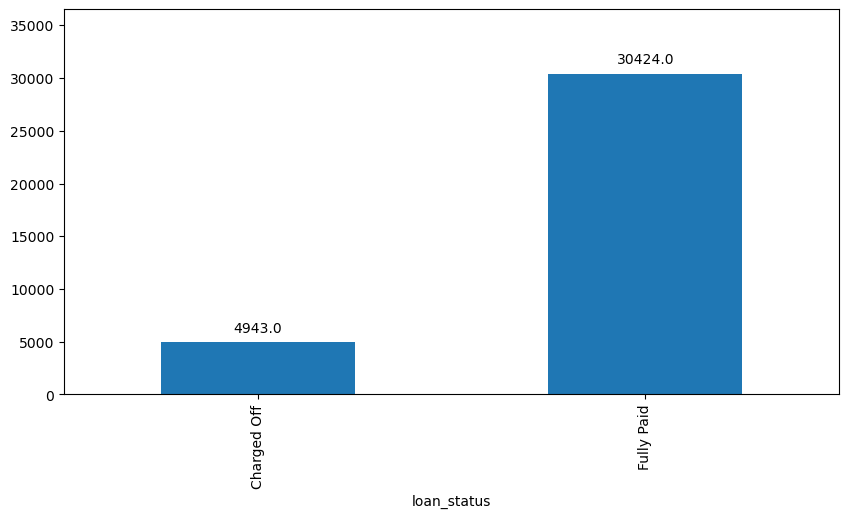

In [50]:
plt.figure(figsize=(10,5))
ax = loan_master_data.groupby('loan_status').loan_amnt.count().plot.bar()
showLabels(ax)
plt.show()

In [51]:
print("Loan defaulted (in percent) : ", round(loan_master_data.loc[loan_master_data['loan_status'] == 'Charged Off'].loan_status.count() * 100/len(loan_master_data)))

Loan defaulted (in percent) :  14


**Observation 1** :Approx 14% of loans in the datasets are defaulted.

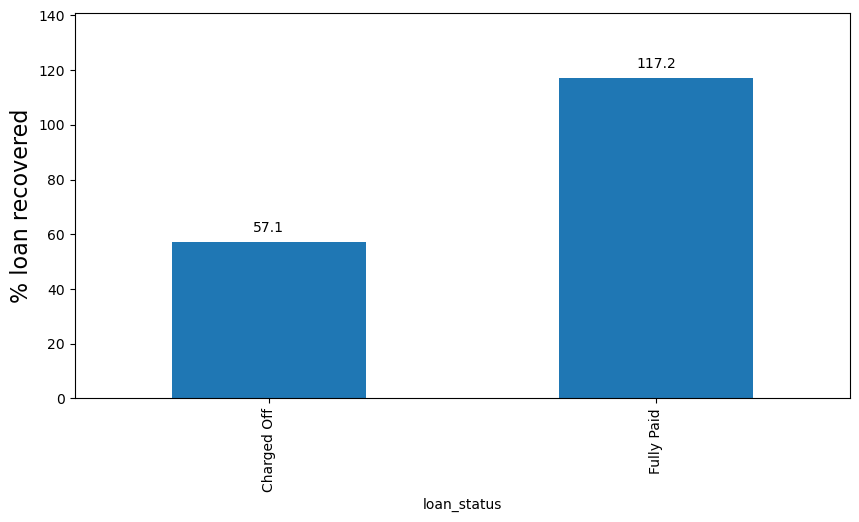

In [52]:
plt.figure(figsize=(10,5))
ax = (loan_master_data.groupby('loan_status').total_pymnt.sum() * 100 / loan_master_data.groupby('loan_status').loan_amnt.sum()).plot.bar()
ax.set_ylabel('% loan recovered', fontsize=16)
plt.margins(0.2, 0.2)
showLabels(ax)

**Observation 2** :
57% of the amount is recovered from defaulted/charged off loan, while 17% profit is made on Fully Paid loans

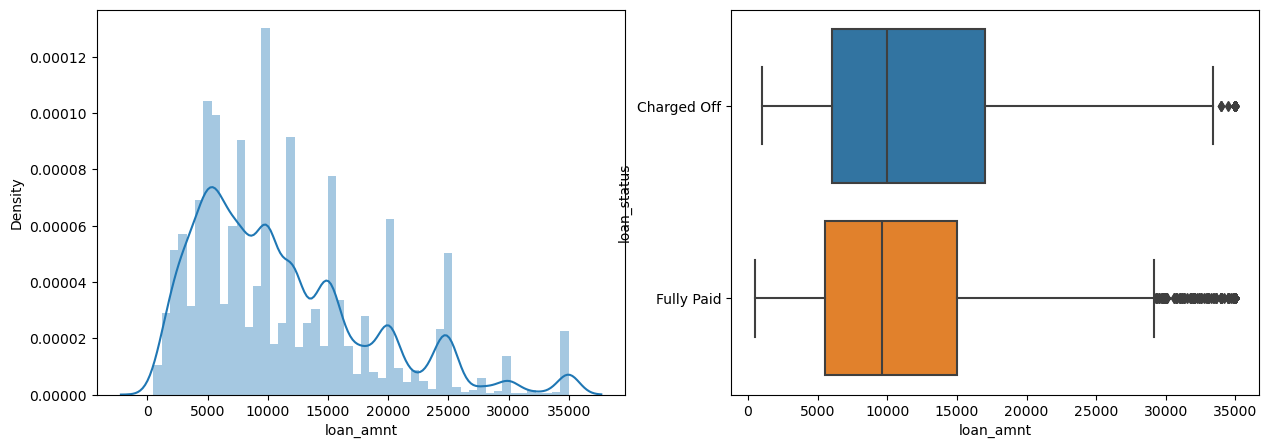

In [53]:
plot_distribution(loan_master_data, 'loan_amnt')

In [54]:
loan_master_data.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,12286.147077,8064.255961,1000.0,6000.0,10000.0,17000.0,35000.0
Fully Paid,30424.0,10945.731166,7181.867451,500.0,5500.0,9600.0,15000.0,35000.0


**Observation 3** :
1. Most of the loan granted are below 15000.
2. Charged off loan average is little on higher side.

In [55]:
#Create Derived categorical variable
loan_master_data['loan_amnt_bin'] = pd.cut(loan_master_data['loan_amnt'], 
                                      [x for x in range(0, 36000, 5000)], labels=[str(x)+'-'+str(x+5)+'k' for x in range (0, 35, 5)])

In [56]:
loan_master_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,earliest_cr_line_month,earliest_cr_line_year,issue_d_month,issue_d_year,loan_amnt_bin
1,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,0,...,1.11,2013-04-01,119.66,2013-09-01,0.0,4,1999,12,2011,0-5k
3,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,...,0.00,2015-01-01,357.48,2016-04-01,0.0,2,1996,12,2011,5-10k
5,5000,5000,5000.0,36,7.90,156.46,A,A4,Veolia Transportaton,3,...,0.00,2015-01-01,161.03,2016-01-01,0.0,11,2004,12,2011,0-5k
6,7000,7000,7000.0,60,15.96,170.08,C,C5,Southern Star Photography,8,...,0.00,2016-05-01,1313.76,2016-05-01,0.0,7,2005,12,2011,5-10k
7,3000,3000,3000.0,36,18.64,109.43,E,E1,MKC Accounting,9,...,0.00,2015-01-01,111.34,2014-12-01,0.0,1,2007,12,2011,0-5k


<Axes: xlabel='loan_amnt_bin', ylabel='% of loans Charged Off'>

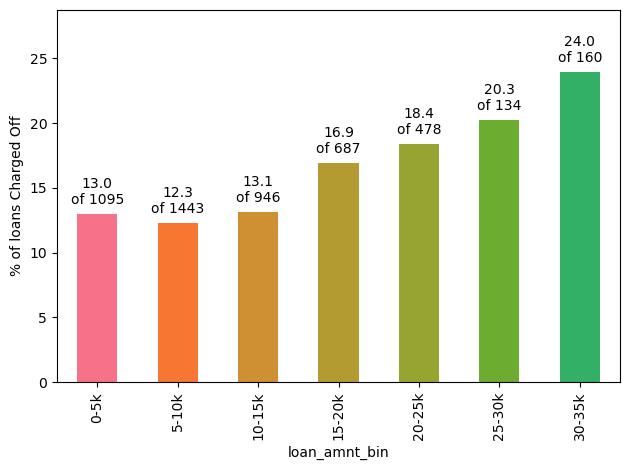

In [57]:
plot_loan_status_percentage(loan_master_data, 'loan_amnt_bin')

**Observation 4**: 
As the loan amount increases , the % of charged off loan also increases. Hence, higher the loans, the risk of defaulters increases.

### **Bar Plots for few Categorical Columns.**

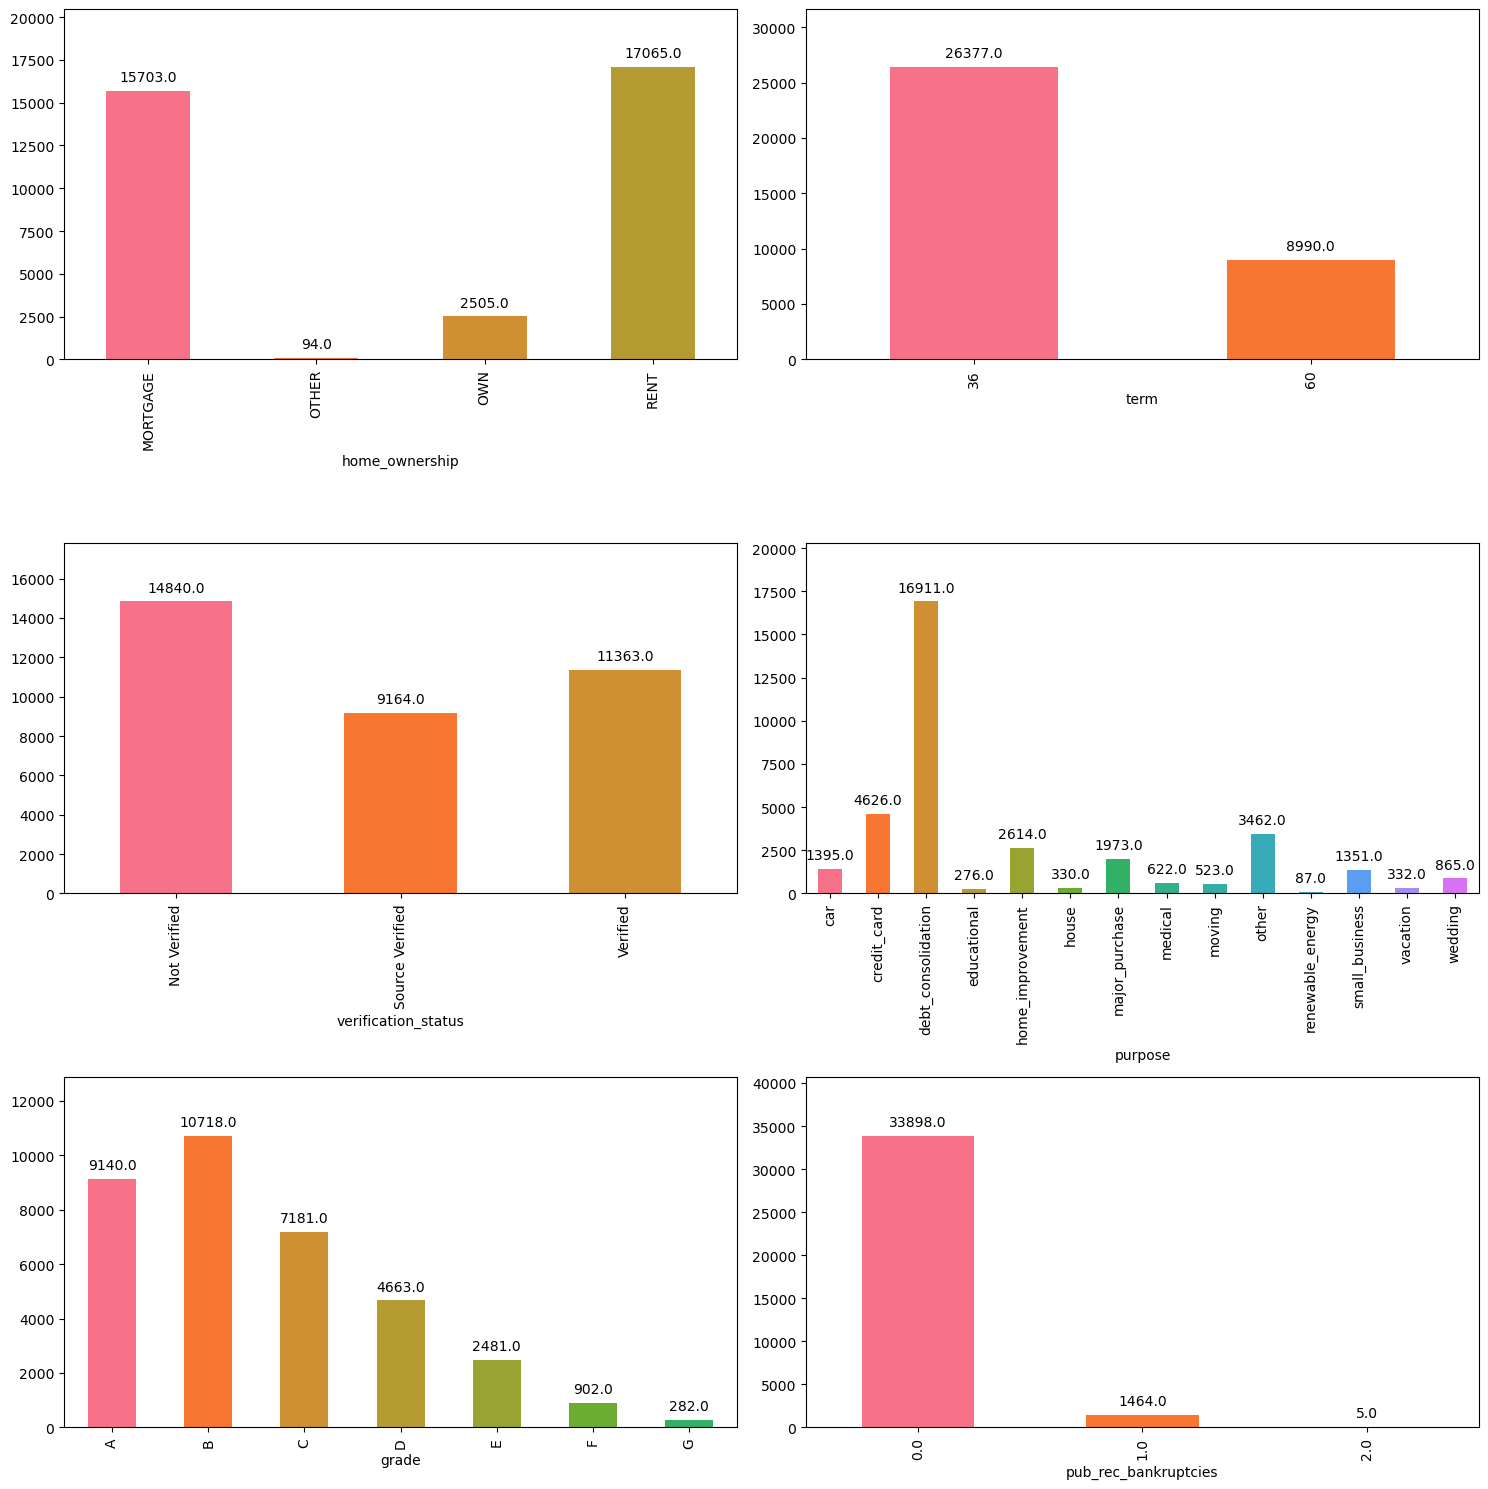

In [58]:
plt.figure(figsize=(15,15))

barPlotsForCategoricalData(loan_master_data, ['home_ownership', 'term', 'verification_status', 'purpose', 'grade', 'pub_rec_bankruptcies'])

**Obervation 5**

1. **Home Ownership:**
  - **Mortgage:** The majority of loan applicants have a mortgage (`15703.0 loans`), indicating that a large portion of borrowers are homeowners with ongoing mortgage payments.
  - **Rent:** A significant number of applicants are renters (`17065.0 loans`), which suggests that loans are also popular among those who do not own property.
  - **Other Ownership Types:** Very few applicants fall under the "Other" and "Own" categories (`2505.0 loans`), indicating that these ownership types are less common among loan applicants.
2. **Loan Term:**
  - **36 Months:** The vast majority of loans have a 36-month term (`26377.0 loans`), which might reflect a preference for shorter loan durations.
  - **60 Months:** Fewer loans have a 60-month term (`8990.0 loans`), suggesting that longer loan terms are less popular or less frequently offered.
3. **Verification Status:**
  - **Not Verified:** The largest number of loans were issued to applicants whose information was "Not Verified" (`14840.0 loans`).
  - **Source Verified:** A substantial number of loans are associated with "Source Verified" applicants (`9164.0 loans`), indicating a significant portion of loans are given to those whose information was verified by the source.
  - **Verified:** Loans to applicants with fully "Verified" information are also common (`11363.0 loans`), showing that verification does play a role in loan issuance.
4. **Purpose of Loan:**
  - **Debt Consolidation:** The primary purpose for loans is debt consolidation (`16911.0 loans`), reflecting a strong trend where borrowers seek to manage or consolidate existing debts.
  - **Credit Card:** Another significant purpose is to refinance credit card debt (`4626.0 loans`).
  - **Other Purposes:** Home improvement (`2614.0 loans`), major purchases (`1973.0 loans`), and medical expenses (`3462.0 loans`) are also common reasons for loans, though less so than debt-related reasons.
5. **Loan Grade:**
  - **Grades A to C:** The distribution of loans shows a higher concentration in grades A (`9140.0 loans`), B (`10718.0 loans`), and C (`7181.0 loans`), indicating that loans are more frequently issued to individuals with higher creditworthiness.
  - **Lower Grades:** There is a significant drop in loans for lower grades, D and below, with grade F (`902.0 loans`) and G (`202.0 loans`) having the fewest loans issued.
6. **Public Record Bankruptcies:**
  - **No Bankruptcy:** The overwhelming majority of loans are associated with applicants who have no public record of bankruptcy (`33889.0 loans`).
  - **Bankruptcy Records:** Loans associated with one public record bankruptcy are relatively rare (`1464.0 loans`), and even fewer have two (`5.0 loans`).
### Insights:
- **Risk Management:** The higher number of loans issued to those with better grades and without bankruptcy suggests that lenders are more inclined to issue loans to low-risk borrowers.
- **Purpose and Verification:** The significant number of loans for debt consolidation and credit card refinancing highlights the financial situations of many borrowers who seek to manage or reduce debt, with verification playing an important role in the approval process.
- **Term Preference:** The preference for shorter loan terms (36 months) might reflect borrowers' desires to repay debts quickly or lenders' preference for shorter-term risk exposure.

#### **Analysing the column - term**
The number of payments on the loan. Values are in months and can be either 36 or 60.

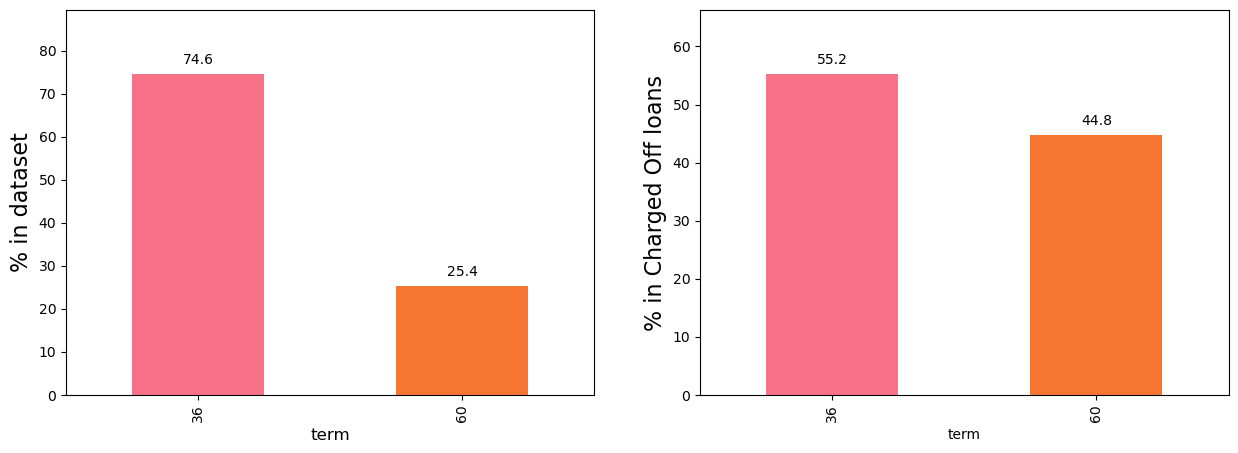

In [59]:
plot_percentages(loan_master_data, 'term')

**Observation 6**:

1. Around 75% of the total loans are given for duration of 3 years. while just 25% of the loans are those given for 5 years.
2. Among Charged Off loans, percentage of term 60 months rises to 45%. The higher term loans have a higher chance of default.

#### **Analysing the column - purpose**
A category provided by the borrower for the loan request.

<Figure size 1500x500 with 0 Axes>

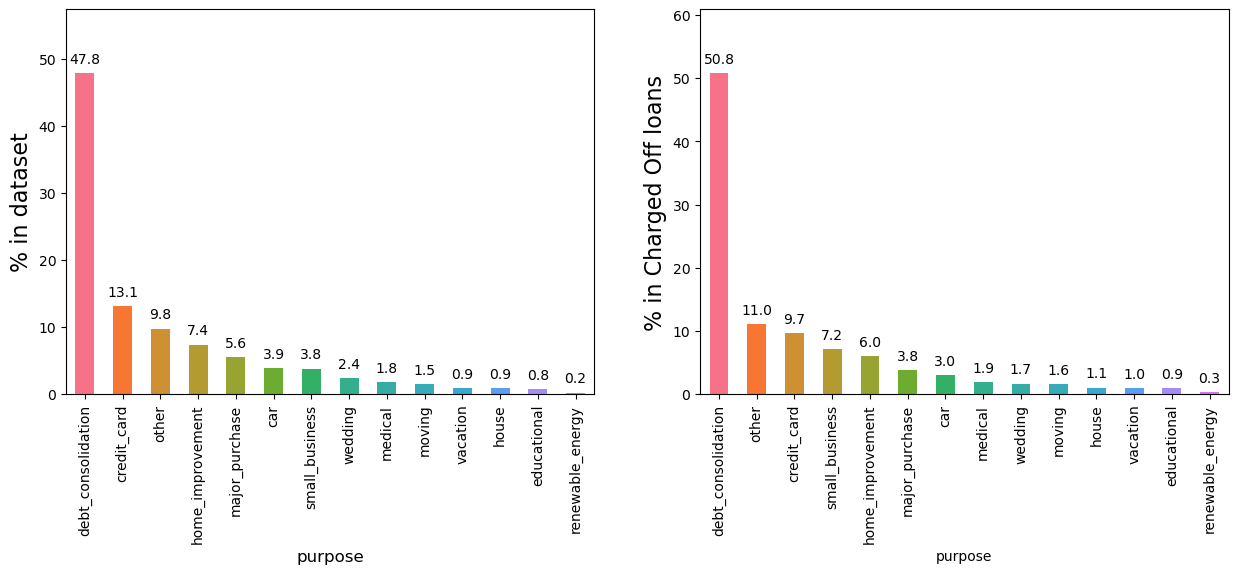

In [60]:
plt.figure(figsize=(15,5))
plot_percentages(loan_master_data, 'purpose')

**Observation 7**:

The category 'small_business' percentage doubles from 3.8 to 7.2 for Charged Off loans. Let's see how the categories of this variable behave.

<Axes: xlabel='purpose', ylabel='% of loans Charged Off'>

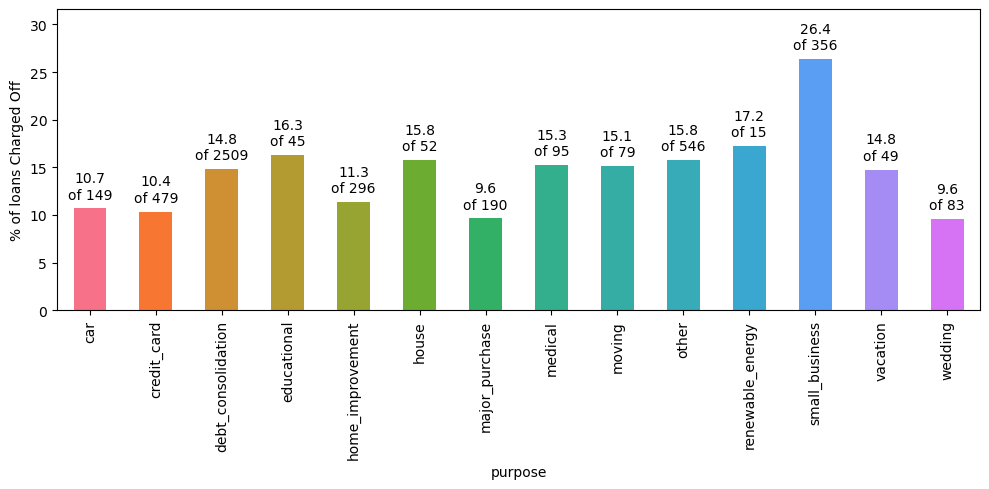

In [61]:
plt.figure(figsize=(10, 5))
plot_loan_status_percentage(loan_master_data, 'purpose')

**Observation 8**:

- 26% of loans for small business are Charged Off. Making them the most risky purpose.

#### **Analysing the column - pub_rec_bankruptcies**
Number of public record bankruptcies

<Axes: xlabel='pub_rec_bankruptcies', ylabel='% of loans Charged Off'>

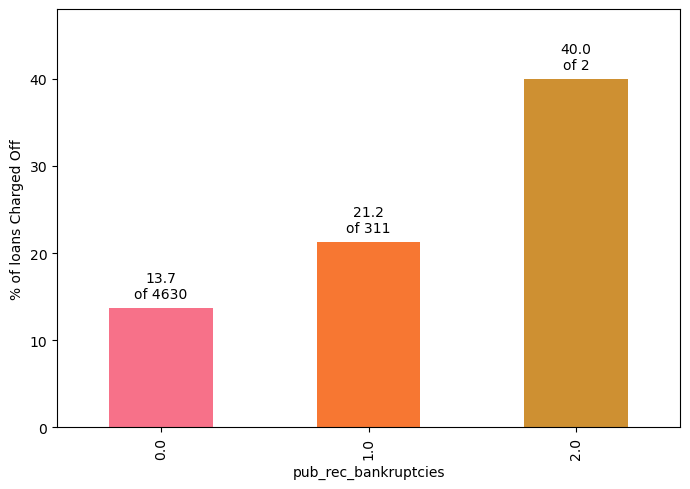

In [62]:
plt.figure(figsize=(7,5))
plot_loan_status_percentage(loan_master_data, 'pub_rec_bankruptcies')

**Observation 9**:

- The percentage of Charged Off loans is markedly higher when the borrower has a prior record of bankruptcy.

#### **Analysing the column - pub_rec**
Number of derogatory public records

In [63]:
loan_master_data.pub_rec.value_counts(normalize=True)

pub_rec
0    0.947663
1    0.050838
2    0.001244
3    0.000198
4    0.000057
Name: proportion, dtype: float64

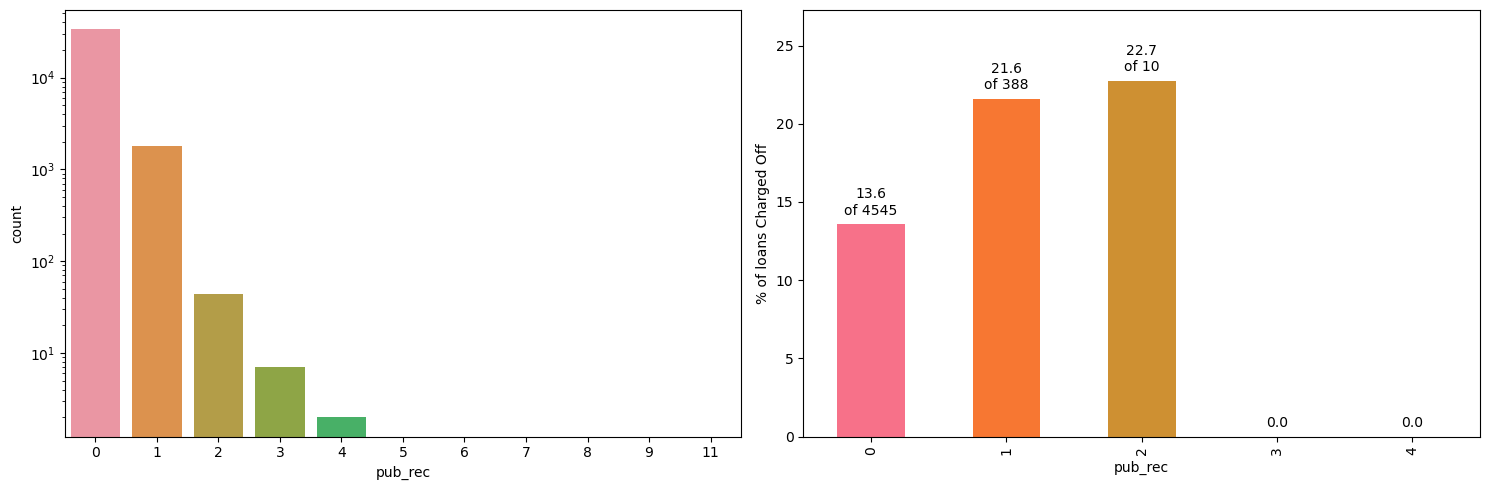

In [66]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
c=sns.countplot(x=loan_master_data['pub_rec'], order=sorted(loan_master_data.delinq_2yrs.unique()))
c.set_yscale('log')

plt.subplot(1, 2, 2)
plot_loan_status_percentage(loan_master_data, 'pub_rec')
plt.show()

**Observation:**

- 94% have no Public derogatory records. 5% have 1 derogatory record.
- Having even 1 derogatory record increases the chances of Charge Off significantly.

#### **Analysing the column - int_rate**
Interest Rate on the loan

In [ ]:
loan_master_data.int_rate.describe()

In [ ]:
plt.figure(figsize=(15,5))
plot_distribution(loan_master_data, 'int_rate')

In [ ]:
loan_master_data.groupby('loan_status')['int_rate'].describe()

**Observation 10**:

- Overall, the intrest rate varies from 5.42% to 24.4% with average intrest rate of 11.8%.
- The intrest rate for Charged Off loans appear to be higher than for Fully paid. This is naturally expected. As, the risk increases the rate of interest imposed on the loan also increases

In [ ]:
loan_master_data['interest_rate_buckets'] = round(loan_master_data['int_rate'])

<Axes: xlabel='interest_rate_buckets', ylabel='% of loans Charged Off'>

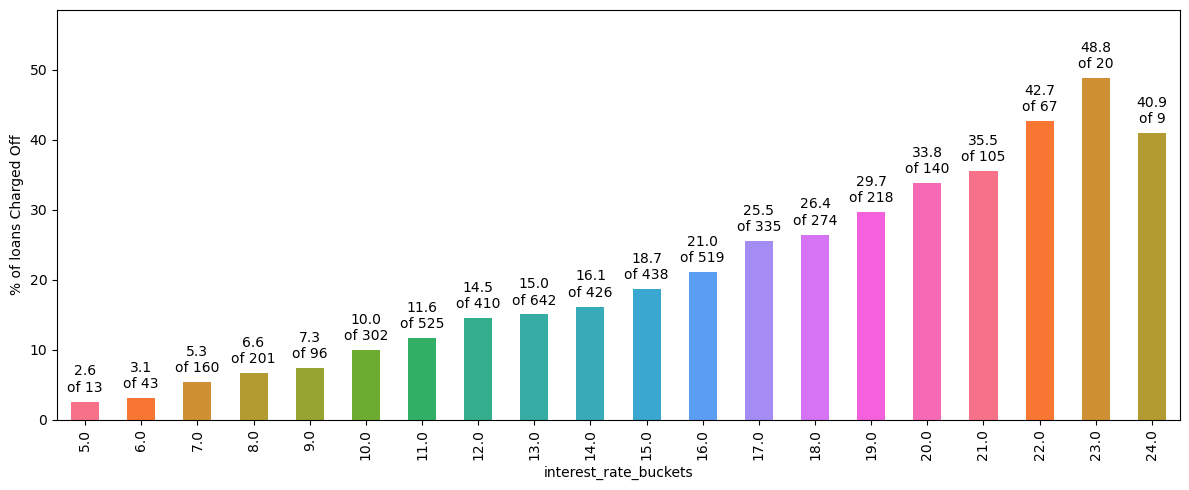

In [491]:
plt.figure(figsize=(12,5))
plot_loan_status_percentage(loan_master_data, 'interest_rate_buckets')

#### **Analysing the column - installment**
The monthly payment owed by the borrower if the loan originates.

In [492]:
loan_master_data.installment.describe()

count    35367.000000
mean       324.043982
std        207.149088
min         16.080000
25%        167.840000
50%        280.620000
75%        426.640000
max       1305.190000
Name: installment, dtype: float64

<Figure size 1500x500 with 0 Axes>

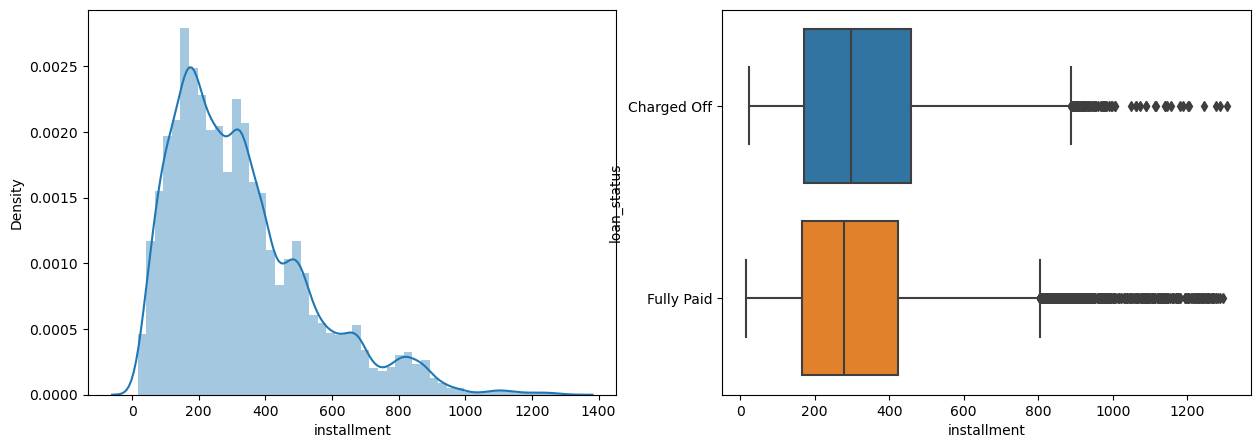

In [493]:
plt.figure(figsize=(15,5))
plot_distribution(loan_master_data, 'installment')

In [494]:
loan_master_data.groupby('loan_status')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,338.848452,214.527655,22.79,172.4350,298.33,458.3150,1305.19
Fully Paid,30424.0,321.638693,205.828423,16.08,167.2975,278.24,422.3075,1295.21


**Observation 11**:

- installment amount varies largely between 170.08 to 420 with median of 280
- loans Charged Off have high installment on average

#### **Analysing the column - grade and sub_grade**

Lending Club assigned loan grade.
Lending Club assigned loan subgrade

In [495]:
loan_master_data.grade.value_counts()

grade
B    10718
A     9140
C     7181
D     4663
E     2481
F      902
G      282
Name: count, dtype: int64

In [496]:
loan_master_data.sub_grade.value_counts(normalize=True).head()

sub_grade
A4    0.075268
B3    0.073204
A5    0.070320
B5    0.069104
B4    0.063534
Name: proportion, dtype: float64

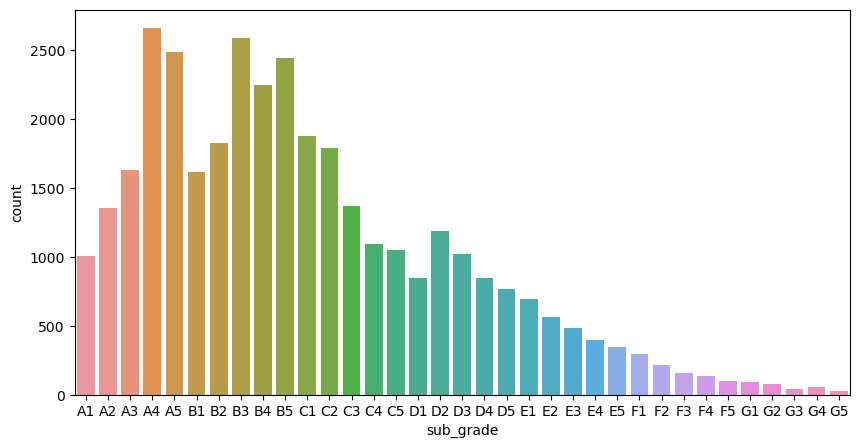

In [713]:
plt.figure(figsize=(10,5))
sns.countplot(x=loan_master_data['sub_grade'], order=sorted(loan_master_data.sub_grade.unique()))
plt.show()

<Figure size 1500x500 with 0 Axes>

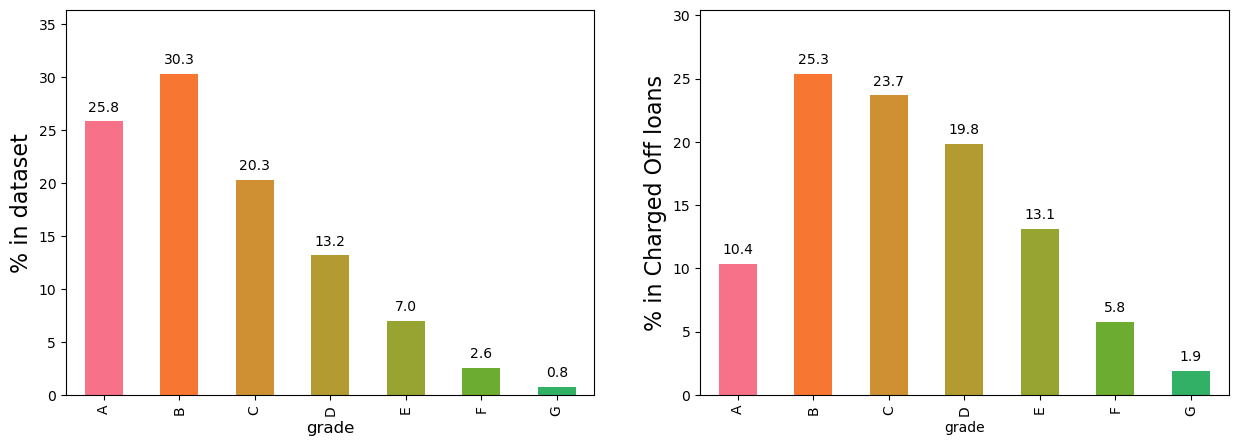

In [704]:
plt.figure(figsize=(15,5))
plot_percentages(loan_master_data, 'grade', True)

**Observation 12**:

- Grade A and B loans are safe. The percentages in full dataset are much higher than percentages in Charged Off loans.
- Grade D, E, F, G loans are less safe. We should plot grade by percentage Charged Off by category
- Lending Clubs grading system is working well.

<Axes: xlabel='grade', ylabel='% of loans Charged Off'>

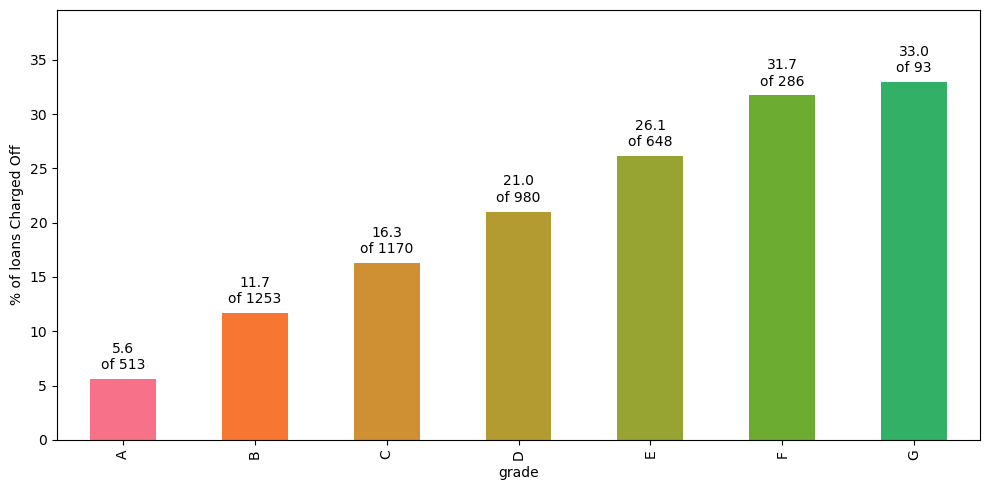

In [717]:
plt.figure(figsize=(10,5))
plot_loan_status_percentage(loan_master_data, 'grade')

**Observation 13**:

- Nearly 30% of all loans in Grades F and G see a default.
- Grade E onwards are risky, and less numerous. Lending Club should either refuse loans or charge high interest rates.

<Axes: title={'center': 'int_rate'}, xlabel='grade'>

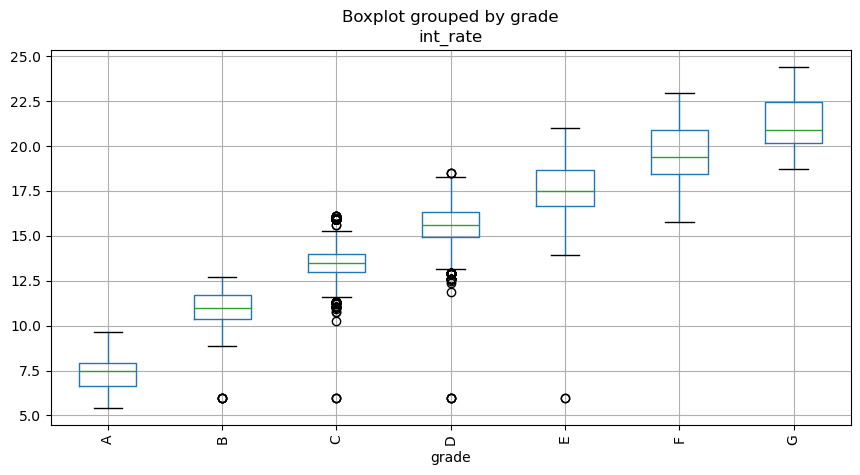

In [718]:
fig, ax = plt.subplots(figsize=(10,5))
loan_master_data.boxplot(column=['int_rate'],by='grade', ax=ax, rot=90)

**Observation 14**:

- Here we see that Lending Club is, correctly, charging higher interest rates for lower grade loans.

#### **Analysing the column - emp_title**

The job title supplied by the Borrower when applying for the loan.

In [780]:
top10_emp_title = loan_master_data.emp_title.value_counts(normalize=False).head(10)
top10_emp_title

emp_title
US Army              128
Bank of America      106
IBM                   65
AT&T                  57
Kaiser Permanente     55
Wells Fargo           52
UPS                   51
USAF                  51
US Air Force          50
Walmart               44
Name: count, dtype: int64

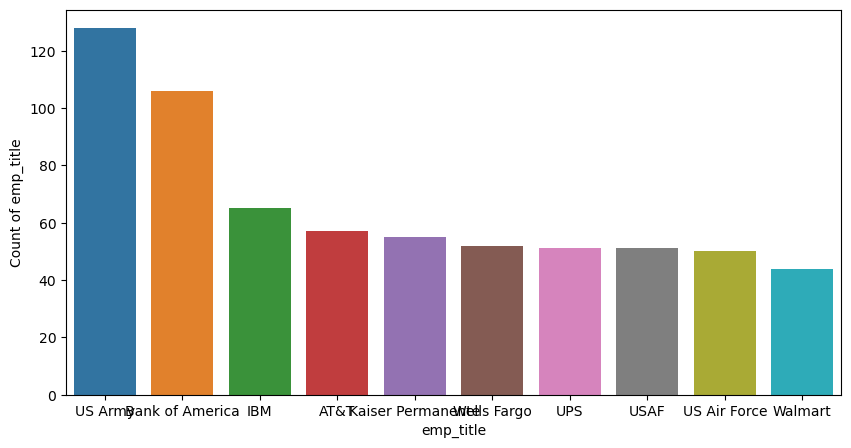

In [781]:
plt.figure(figsize=(10,5))
a=sns.barplot(x=top10_emp_title.index, y=top10_emp_title.values)
a.set_ylabel('Count of emp_title')
plt.show()

**Observation 15**:

- Max of the loan takers are from the US Army, then Bank of America follwed by IBM and AT&T.
- Kaiser Permanents, wells Fargo, UPS, USAF, US Air Force and Walmart are also among the top 10 emp_title loans.
- The numbers per employer are quite low, and this variable is unlikely to have an impact on default rates.

<Axes: xlabel='emp_title', ylabel='% of loans Charged Off'>

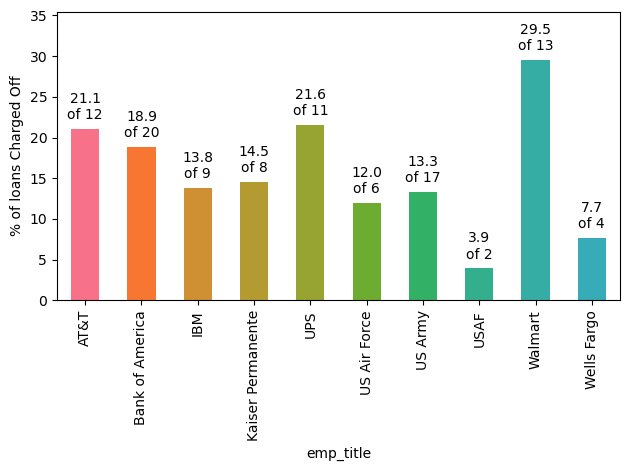

In [782]:
plot_loan_status_percentage(loan_master_data[loan_master_data['emp_title'].isin(top10_emp_title.index.values)], 'emp_title')

#### **Analysing the column - emp_length**

The job title supplied by the Borrower when applying for the loan.

In [783]:
loan_master_data.emp_length.value_counts(normalize=True)

emp_length
10    0.226991
2     0.115447
0     0.112478
3     0.108378
4     0.090649
5     0.086041
1     0.083666
6     0.058303
7     0.046314
8     0.038482
9     0.033251
Name: proportion, dtype: float64

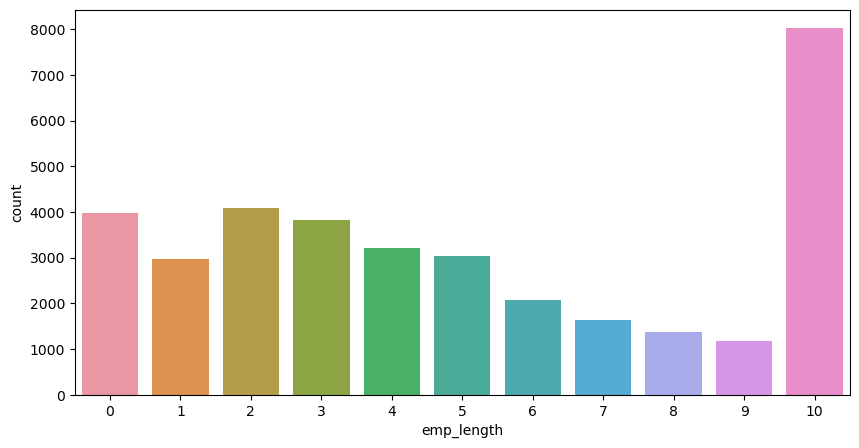

In [784]:
plt.figure(figsize=(10,5))
sns.countplot(x=loan_master_data['emp_length'], order=sorted(loan_master_data['emp_length'].unique()))
plt.show()

<Figure size 1500x500 with 0 Axes>

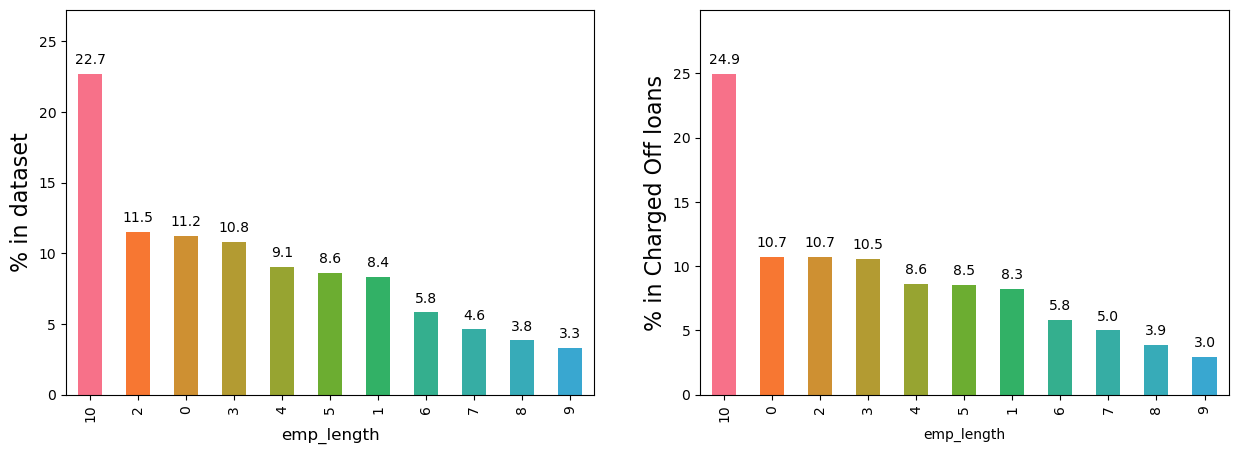

In [785]:
plt.figure(figsize=(15, 5))
plot_percentages(loan_master_data, 'emp_length')

**Observation 16**:

- 22.7% of the of loan taker have an employment length of more than 10 years.
- There is no impact of employment length to chance of loan default.

#### **Analysing the column - annual_inc**

The self-reported annual income provided by the borrower during registration.

<Axes: xlabel='annual_inc'>

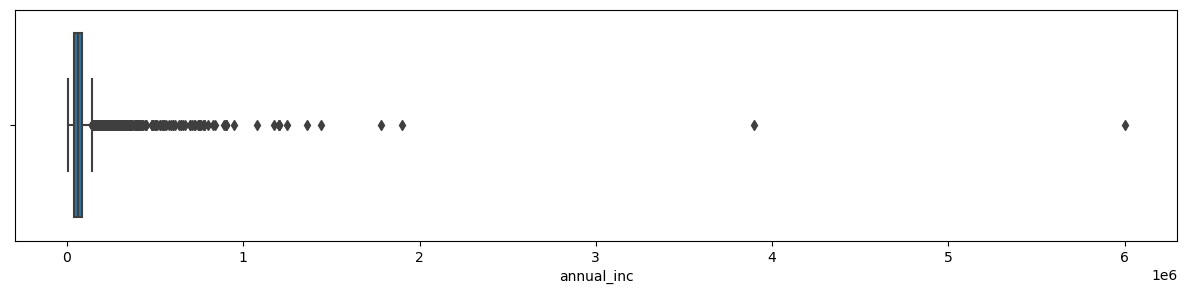

In [786]:
plt.figure(figsize=(15, 3))
sns.boxplot(x=loan_master_data['annual_inc'], data=loan_master_data)

In [787]:
loan_master_data.annual_inc.describe()

count    3.536700e+04
mean     6.909599e+04
std      6.396705e+04
min      4.000000e+03
25%      4.150000e+04
50%      6.000000e+04
75%      8.250000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

- The annual income reprted by the borrowers range from min of 4,000 to max of 6,000,000. 
- Median annual income is around 60,000
- Most people have an annual income less than 115000

In [788]:
# Remove outliers

Q1 = loan_master_data['annual_inc'].quantile(0.25)
Q3 = loan_master_data['annual_inc'].quantile(0.75)
IQR = Q3 - Q1
# Filter out the outliers
data_without_outliers = loan_master_data[(loan_master_data['annual_inc'] >= (Q1 - 1.5 * IQR)) & (loan_master_data['annual_inc'] <= (Q3 + 1.5 * IQR))]


In [789]:
data_without_outliers.annual_inc.describe()

count     33747.000000
mean      61719.146652
std       27763.774295
min        4000.000000
25%       40000.000000
50%       57000.000000
75%       78281.170000
max      144000.000000
Name: annual_inc, dtype: float64

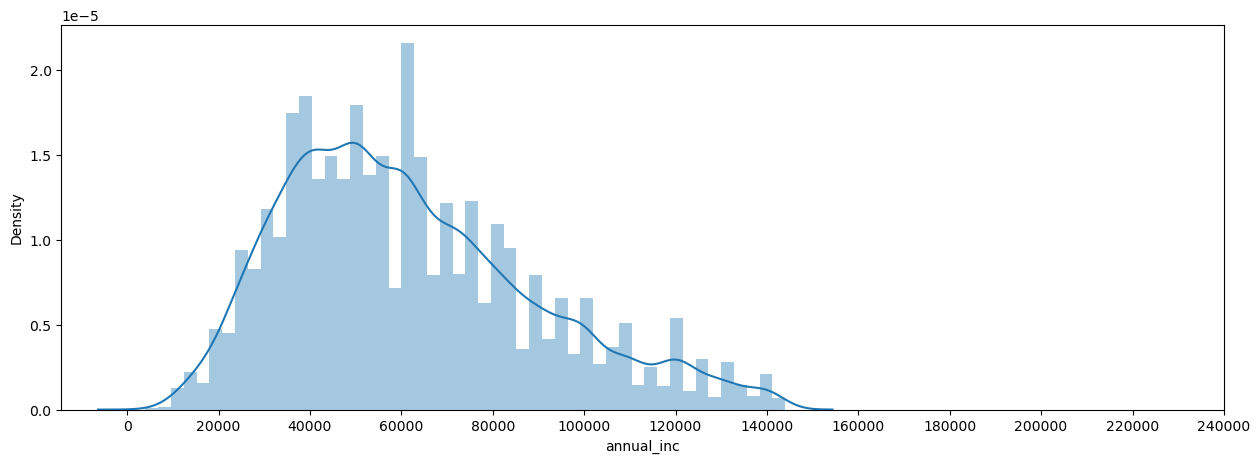

In [790]:
plt.figure(figsize=(15, 5))
sns.distplot(data_without_outliers['annual_inc'], hist_kws={'log':False})
plt.xticks(np.arange(0, 260000, 20000))
plt.show()

In [791]:
#Create Derived categorical variable
loan_master_data['income_bin'] = loan_master_data['annual_inc']/20000
loan_master_data['income_bin'] = loan_master_data['income_bin'].astype(int)

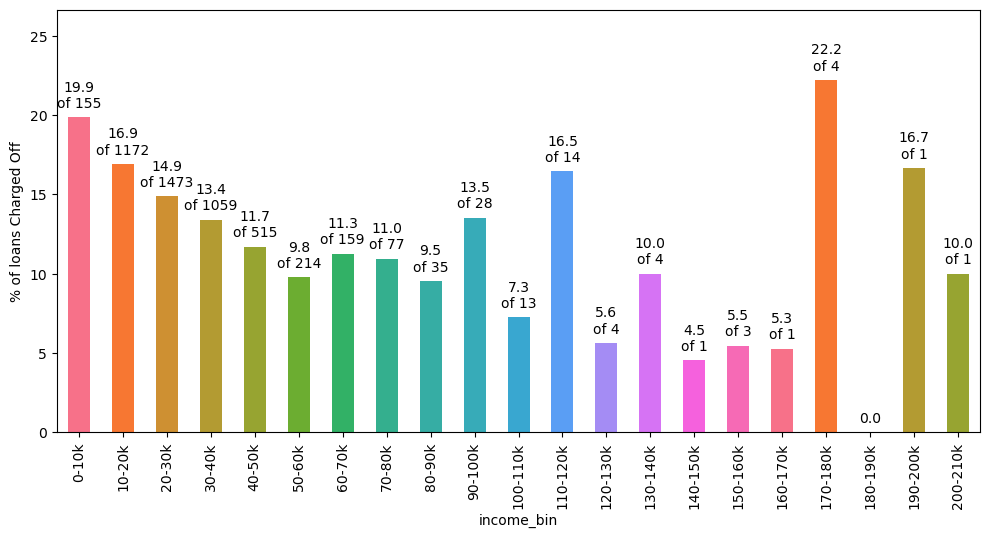

In [792]:
plt.figure(figsize=(10,5))
ax = plot_loan_status_percentage(loan_master_data.loc[loan_master_data['income_bin']<21], 'income_bin')
ax.set_xticklabels([(str(int(x.get_text())*10)+'-'+str(int(x.get_text())*10+10)+'k') for x in ax.get_xticklabels()])
plt.show()

**Observation 17**:

- Loan defaults are higher for lower income, and progressively reduce as incomes go up.
- It will be interesting to see a bivariate analysis of defaults by income buckets and loan amounts later.

#### **Analysing the column - verification_status**

Indicates if income was verified by LC, not verified, or if the income source was verified

<Figure size 2000x500 with 0 Axes>

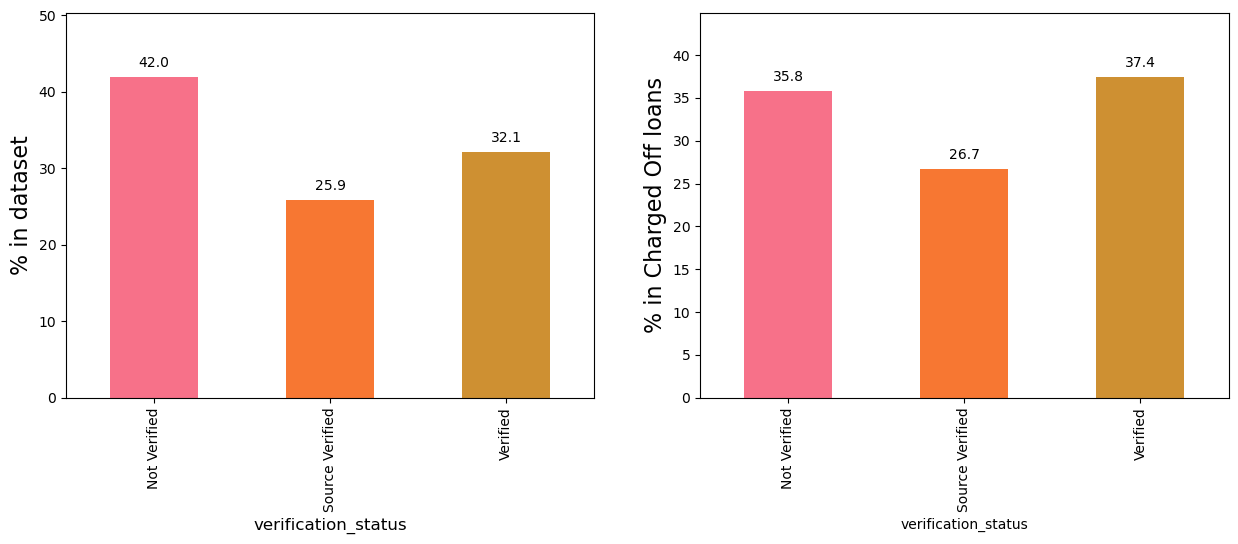

In [793]:
plt.figure(figsize=(20,5))
plot_percentages(loan_master_data, 'verification_status', True)

**Observation 18**:

- Overall, it appears that there are more 'Non Verified' loans than the 'Source Verified' and 'Verified' loans. LC should take steps to verify these loans income so as to reduce the Charge Off percentage.
- Verified loans show more charged Off percentage as compared to Not verified loans. This is unexpected and will be investigated later in bivariate analysis

#### **Analysing the column - issue_d_year and issue_d_month**

The month and year which the loan was funded

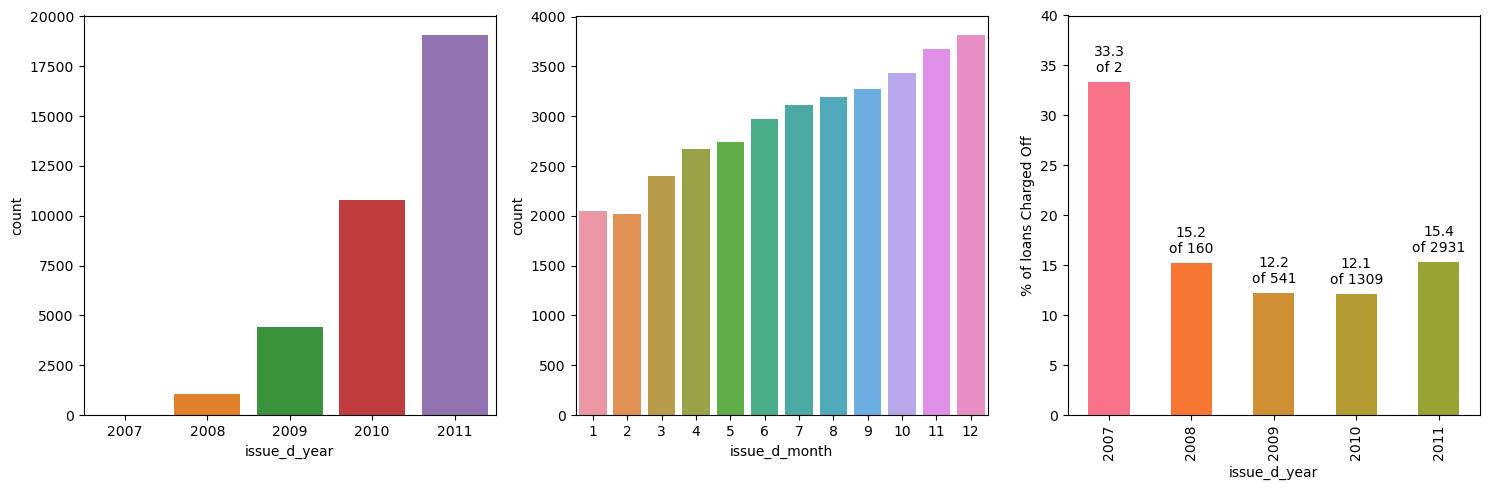

In [794]:
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
sns.countplot(x=loan_master_data['issue_d_year'], order=sorted(loan_master_data.issue_d_year.unique()))

plt.subplot(1, 3, 2)
sns.countplot(x=loan_master_data['issue_d_month'], order=sorted(loan_master_data.issue_d_month.unique()))

#Fraction of loans charged off and fully Paid
plt.subplot(1, 3, 3)
plot_loan_status_percentage(loan_master_data, 'issue_d_year')

plt.show()

Observation:

- Over the years, LC as an organisation has been giving more loans. From Aug,2007 to 2011 the loans issued have risen significantly.
- Within a year, the number of loan issued rises over the month from jan to Dec. Dcember is the month of the year were the maximum number of loans are being issued. Is the company trying to meet targets in the later months of the year?
- Year of loan has no significant effect on likelihood of default.

<Axes: xlabel='issue_d_month', ylabel='% of loans Charged Off'>

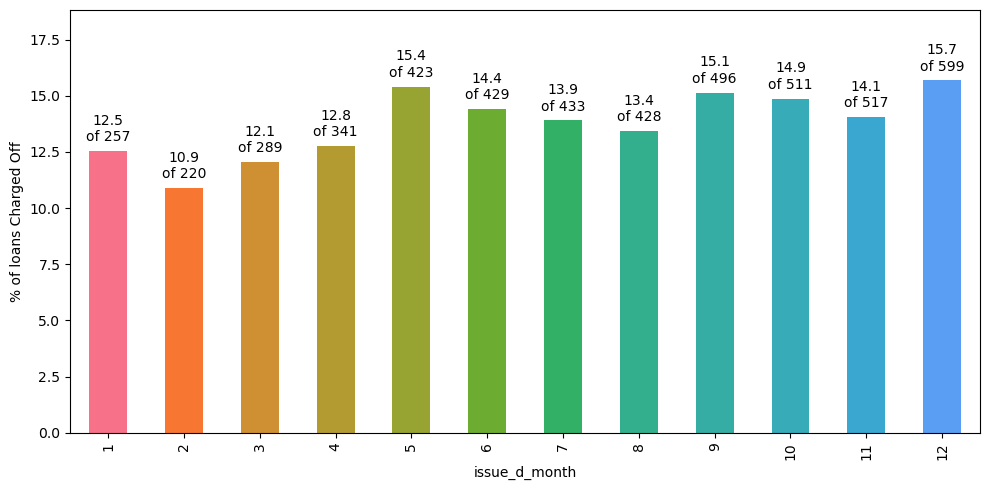

In [795]:
plt.figure(figsize=(10, 5))
plot_loan_status_percentage(loan_master_data, 'issue_d_month')

Observation:

Month of loan is spread out and has no significant effect on likelihood of default.

#### **Analysing the column - addr_state**

The state provided by the borrower in the loan application

In [776]:
loan_master_data.addr_state.value_counts(normalize=True).head(10)

addr_state
CA    0.180847
NY    0.095739
FL    0.071677
TX    0.069358
NJ    0.047134
IL    0.039048
PA    0.038822
VA    0.035626
GA    0.035429
MA    0.033393
Name: proportion, dtype: float64

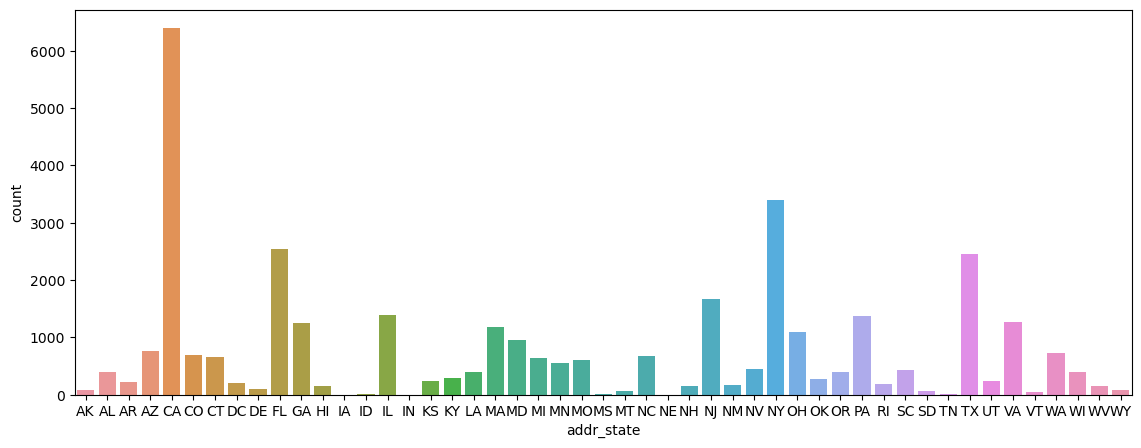

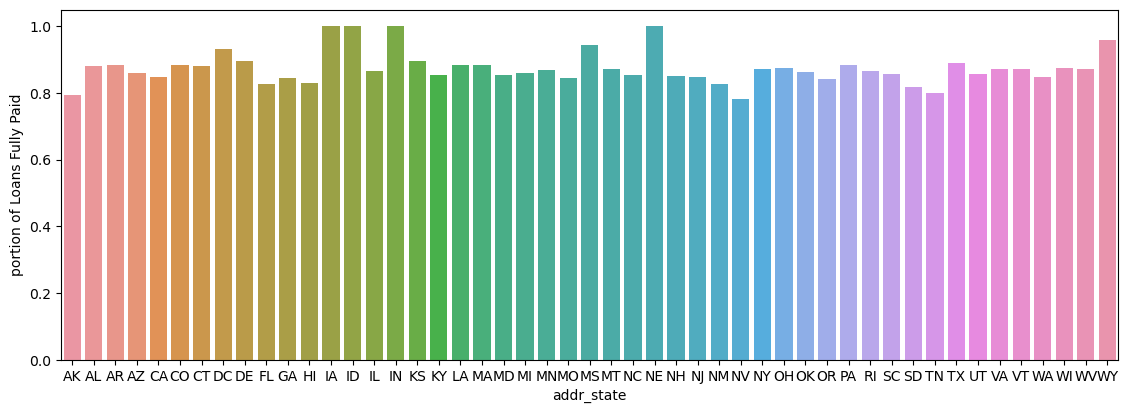

In [738]:
plt.figure(figsize=(30,5))
plt.subplot(1, 2, 1)
sns.countplot(x=loan_master_data['addr_state'], order=sorted(loan_master_data.addr_state.unique()))

#Fraction of loans charged off and fully Paid
charge_off_count = loan_master_data.groupby('addr_state')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']  
Fully_paid_count = loan_master_data.groupby('addr_state')['loan_status'].value_counts(normalize=True).loc[:,'Fully Paid']  

plt.figure(figsize=(30,10))
plt.subplot(2, 2, 1)
a=sns.barplot(x=charge_off_count.index, y=charge_off_count.values)
a.set_ylabel('portion of Loans Charged-off')
#plt.subplot(1, 2, 2)
b=sns.barplot(x=Fully_paid_count.index, y=Fully_paid_count.values)
b.set_ylabel('portion of Loans Fully Paid')
plt.show()

Observation:

- Maximum loans ~18% are from California following that is 9.5% from New york state and Florida with 7%. This is to be expected as these are also the three most populous US states
- States with higher Charge Off rates have very low number of loans. The percentage is therefore NOT significant and should be ignored. Overall, this variable does not affect propensity to default.

#### **Analysing the column - dti**

A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

<Figure size 1000x500 with 0 Axes>

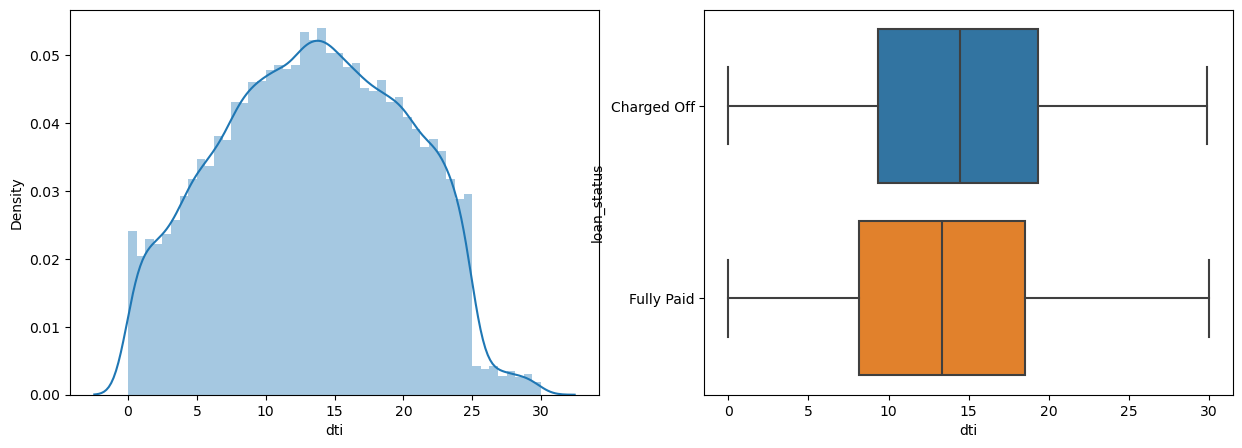

In [801]:
plt.figure(figsize=(10,5))

plot_distribution(loan_master_data, 'dti')

In [800]:
loan_master_data.dti.describe()

count    35367.000000
mean        13.403961
std          6.636540
min          0.000000
25%          8.320000
50%         13.500000
75%         18.640000
max         29.990000
Name: dti, dtype: float64

Max value is 30 and min is 0, 

In [803]:
loan_master_data['dti_bin'] = pd.cut(loan_master_data['dti'], [0,5,10,15,20,25,30], labels=['0-5','5-10','10-15','15-20','20-25','25-30'])

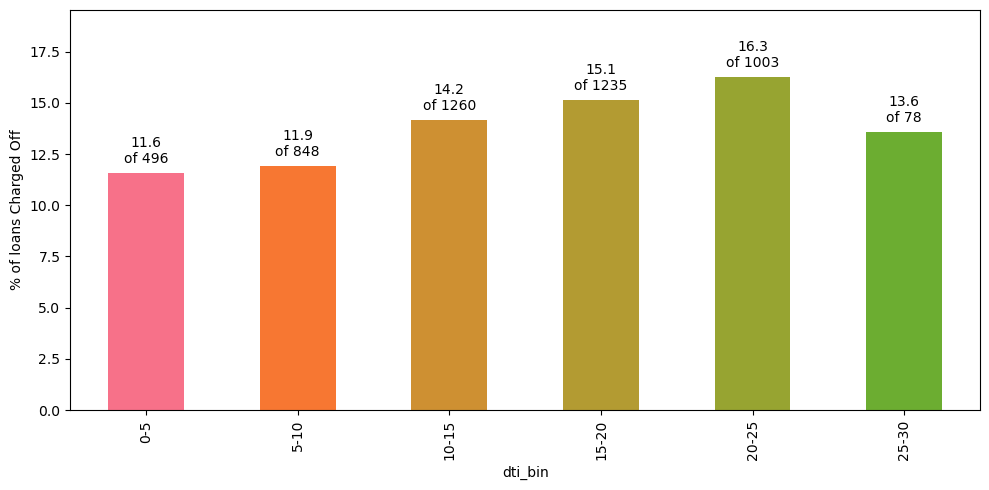

In [805]:
plt.figure(figsize=(10,5))
plotLoanStatus(loan_master_data, 'dti_bin')
plt.show()

### Observation:

- Higher the dti , the % of loans getting charged off increases.

### Derived variable - ratio of loan amount to annual income

<Axes: xlabel='ratio', ylabel='Density'>

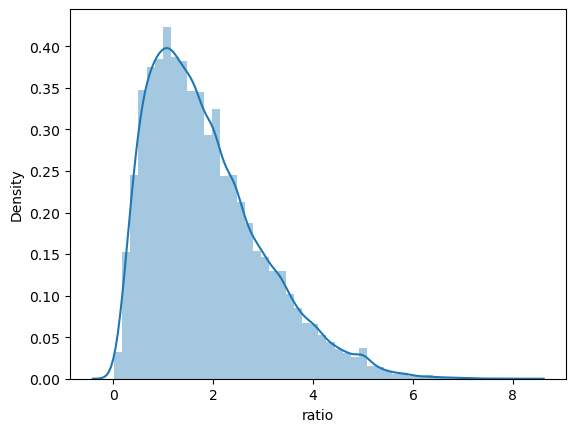

In [739]:
loan_master_data['ratio'] = loan_master_data['loan_amnt'] * 10 / loan_master_data['annual_inc']
sns.distplot(loan_master_data['ratio'])

<Axes: xlabel='ratio_bin', ylabel='% of loans Charged Off'>

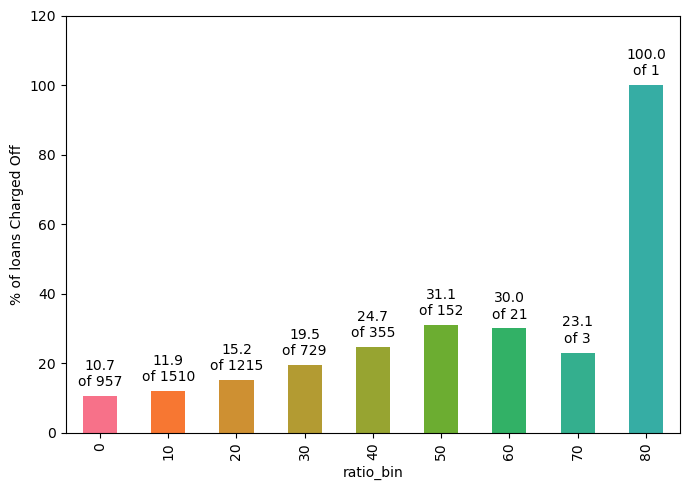

In [740]:
loan_master_data['ratio_bin'] = (loan_master_data['ratio'].astype(int)) * 10
plt.figure(figsize=(7,5))
plot_loan_status_percentage(loan_master_data, 'ratio_bin')

Observation:

- As long as loan amount is less than 20% of annual income, defaults are low.
- Loan amounts of 30% of annual income or higher see a high rate of default.

## Bivariate Analysis

**loan_amnt over time**

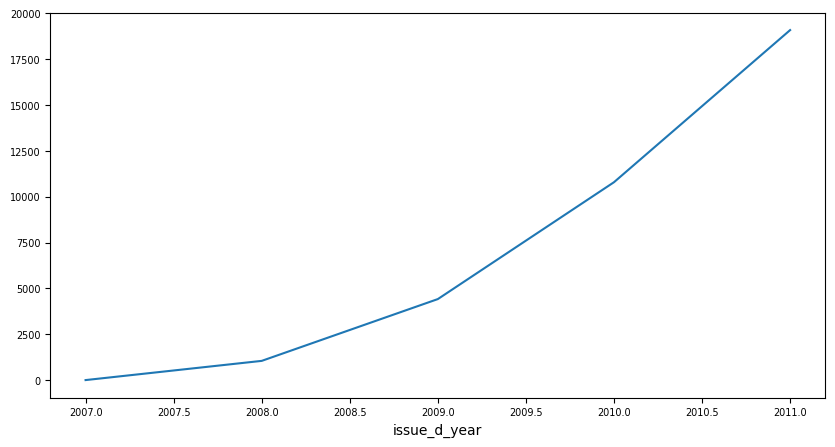

In [741]:
plt.figure(figsize=(10,5))
loan_master_data.groupby('issue_d_year').loan_amnt.count().plot(kind='line', fontsize=7)
plt.show()

**Avg. loan_amnt over time**

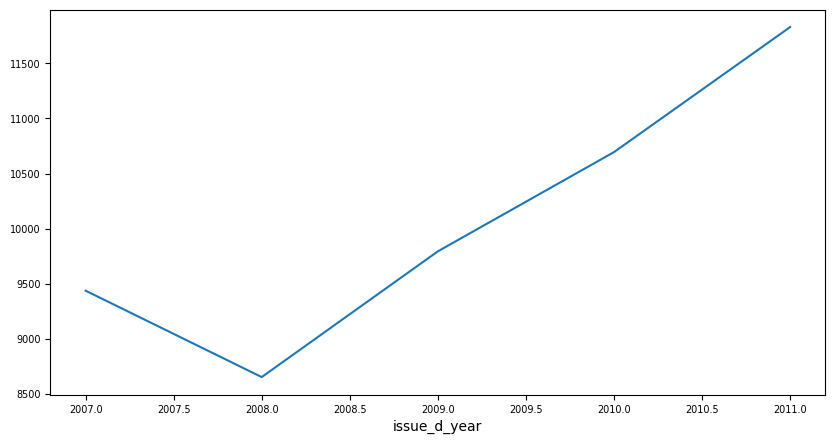

In [742]:
plt.figure(figsize=(10,5))
loan_master_data.groupby('issue_d_year').loan_amnt.mean().plot(kind='line', fontsize=7)
plt.show()

Observation:

- Average loan amount dropped sharply when subprime mortgage crisis hit

**loan_amnt and annual_inc**

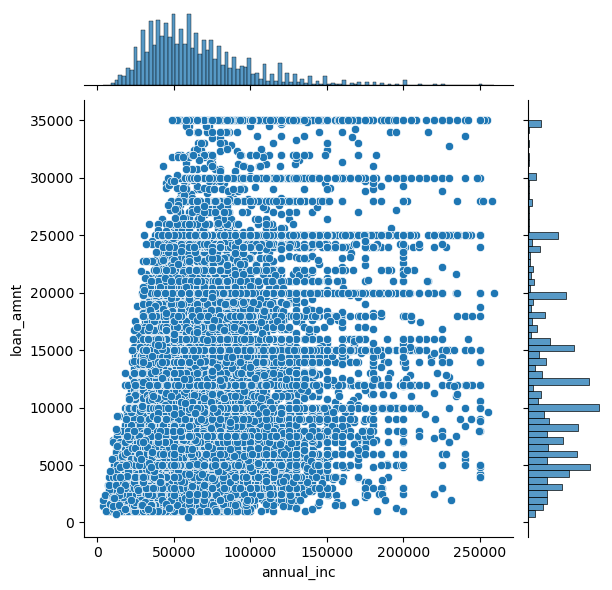

In [743]:
# sns.jointplot('annual_inc', 'loan_amnt', loan_master_data.loc[loan_master_data['annual_inc']<260000])
# plt.show()

filtered_data = loan_master_data.loc[loan_master_data['annual_inc'] < 260000]  # Filter data

# Create jointplot with filtered data
sns.jointplot(x="annual_inc", y="loan_amnt", data=filtered_data)
plt.show()

Observation:

There are people with average income lower than 50000 taking loans of 25000 or higher. These would be risky loans.

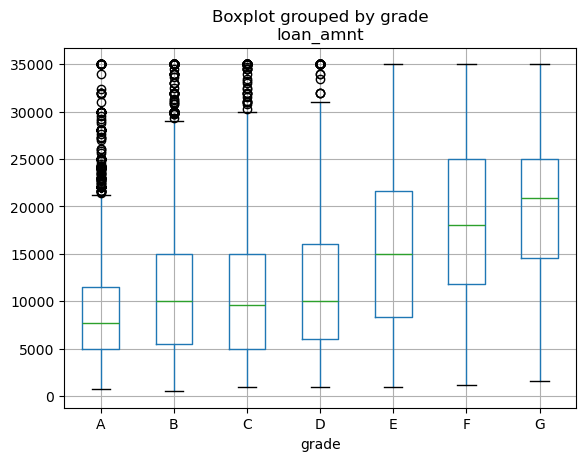

In [744]:
loan_master_data.boxplot(column='loan_amnt', by='grade')
plt.show()

Larger loans generally appear to be given a lower grade, with the median loan amount for a grade G loan being almost 10000 higher than that of a grade A, B, or C loan.

### loan_amnt vs verification_status vs loan status

<Axes: xlabel='verification_status', ylabel='loan_amnt'>

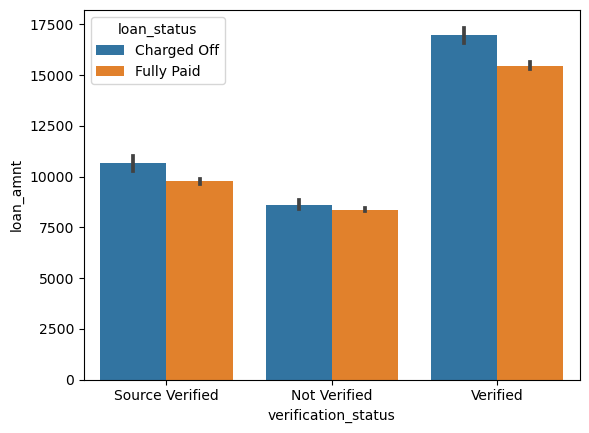

In [745]:
sns.barplot(x='verification_status', y='loan_amnt', hue="loan_status", data=loan_master_data, estimator=np.mean)

Observation:

- Higher loan amounts are Verified more often.
- We already know that larger loans are less in number, but see a higher charge off rate.
- This, combined with previous observation, explains why verfied loans see a higher rate of default. It's not the verified status per se, it's the fact that higher loan amounts are riskier and are also verified more often by Lending Club.

### Interest Rate and Term

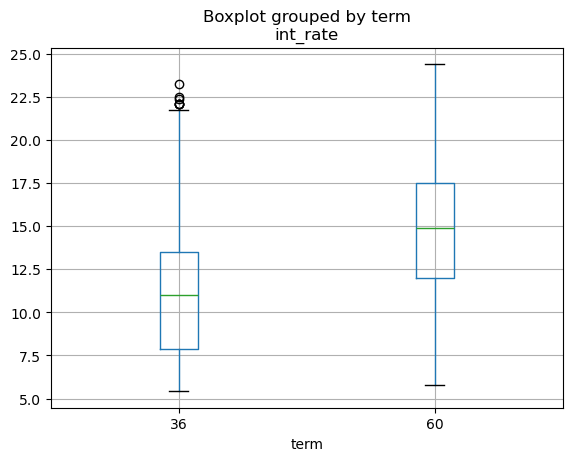

In [746]:
loan_master_data.boxplot(column='int_rate', by='term')
plt.show()

Observation:

Intrest rates are besed on term. Larger amounts were seen to be given for higher term. Ther rate of intrest associated with them is also high.

### Interest Rate and Sub Grade

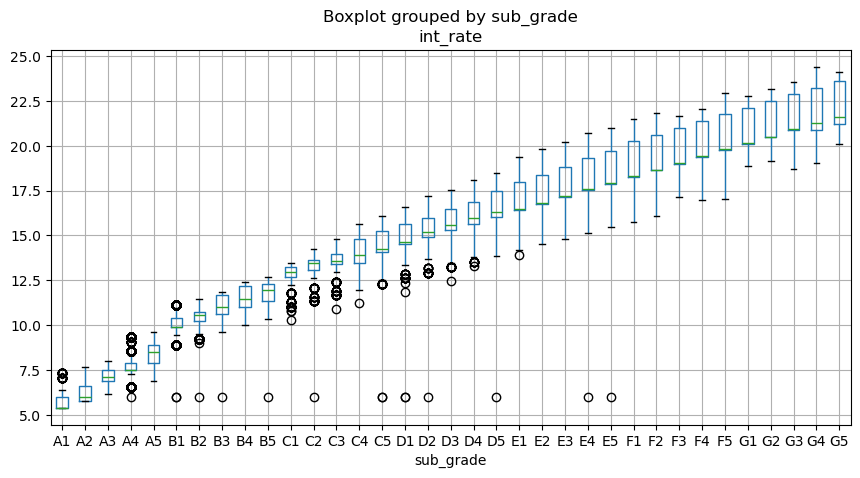

In [747]:
loan_master_data.boxplot(column='int_rate', by='sub_grade',figsize=(10,5))
plt.show()

Observation:

- Intrest rates varies directly with the subgrade. Larger or worst the sub grade, higher are the rate of intrest for the loan.

<Axes: title={'center': 'int_rate'}, xlabel='loan_status'>

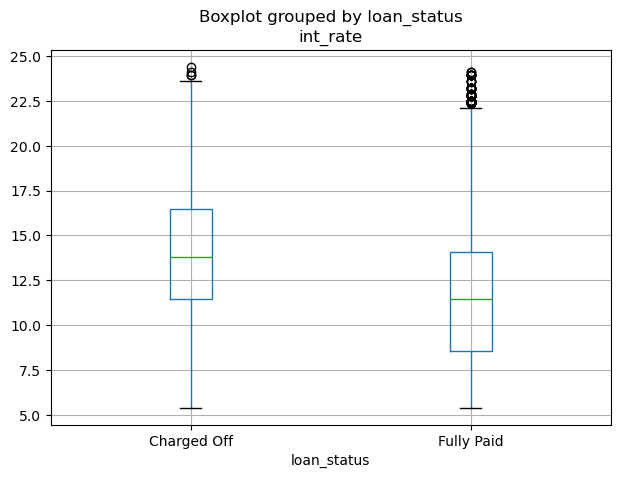

In [748]:
loan_master_data.boxplot(column='int_rate', by='loan_status',figsize=(7,5))

Observation:

- Loans at a higher intrest rate are more likely to be Charged Off.

### Loan amount vs Grade vs Term

AttributeError: 'numpy.int64' object has no attribute 'startswith'

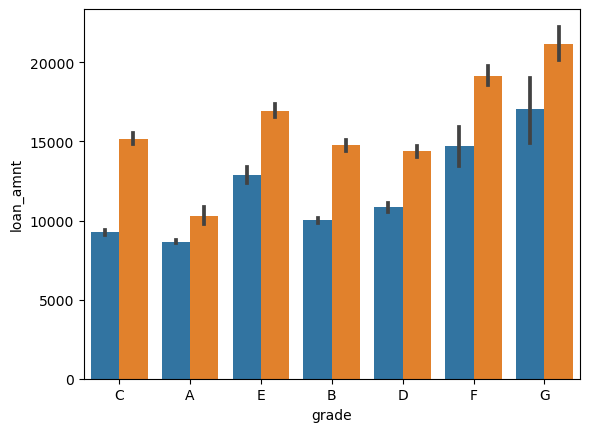

In [798]:
sns.barplot(x='grade', y='loan_amnt', hue="term", data=loan_master_data, estimator=np.mean)
plt.show()

Observation:

- Our assumption made during univariate analysis is more evident with this plot. Higher loan amount are associated with lower grade for longer terms.

### Loan amount Vs term Vs Loan Status

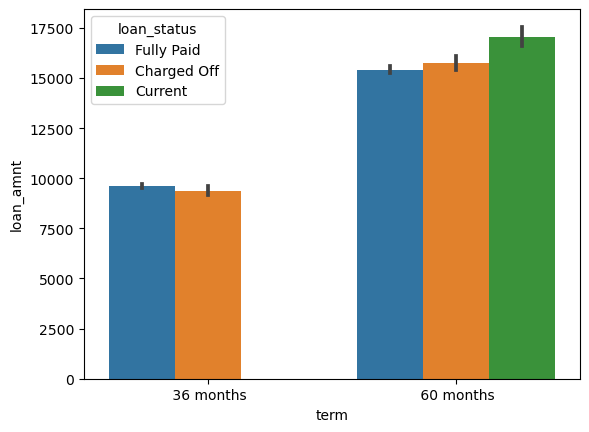

In [751]:
sns.barplot(x='term', y='loan_amnt', hue="loan_status", data=loan, estimator=np.mean)
plt.show()

Observation:

- Our assumption made during univariate analysis is more evident with this plot. Higher loan amount are associated with longer terms and see higher Charge Offs.

### revol_util Vs grade Vs Loan Status

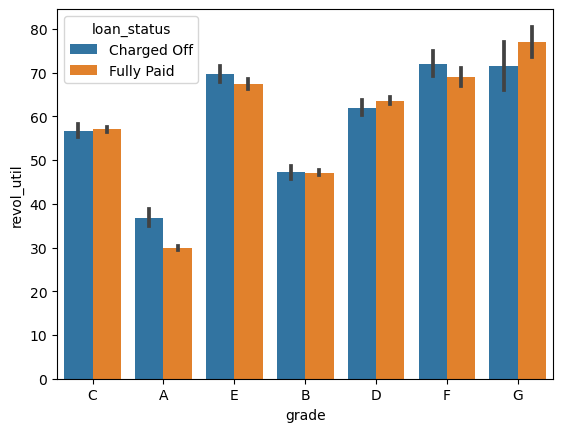

In [752]:
sns.barplot(x='grade', y='revol_util', hue="loan_status", data=loan_master_data, estimator=np.mean)
plt.show()

Observation:

revol_util and grade(and therefore int_rate) are correlated in some way. The revol_util is positivly correlated to the grade. As the grade goes from A to E the revol_util also increases. This may be because higer loan amounts are accosiated with higher grades.

### Loan amount Vs addr_state vs loan Status

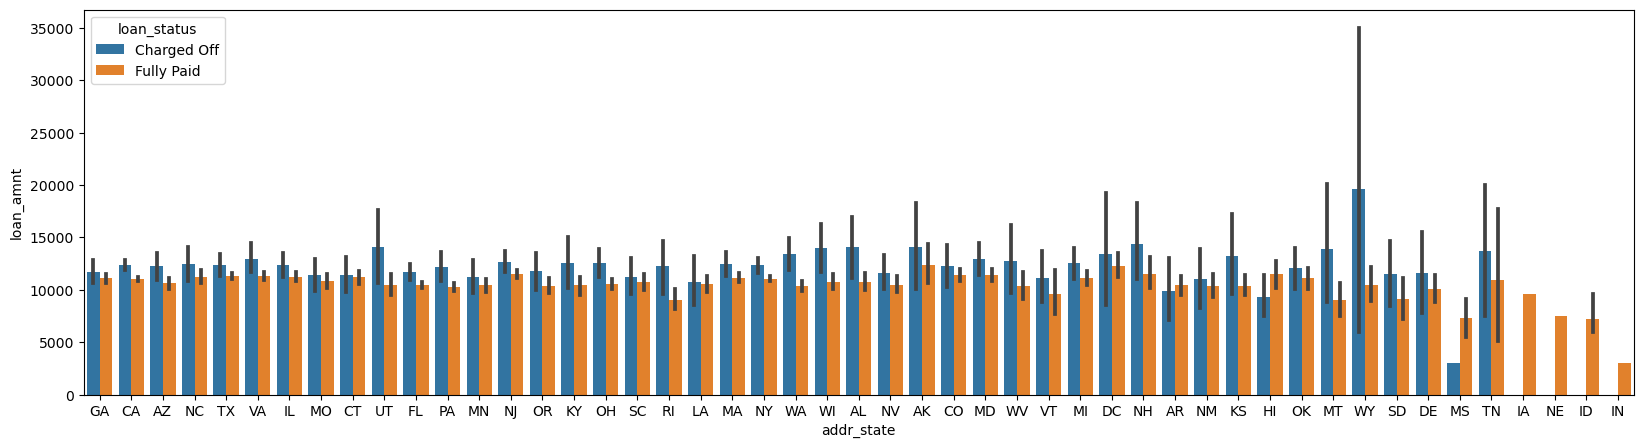

In [753]:
plt.figure(figsize=(20,5))
sns.barplot(x='addr_state', y='loan_amnt', hue='loan_status',data=loan_master_data, estimator=np.mean)
plt.show()

Observation:

States WY: Wyoming has the the highest average loan amount that was charged off. whats happening in this state is somthing LC can investigate into for this state.

### revol_rate Vs int_rate

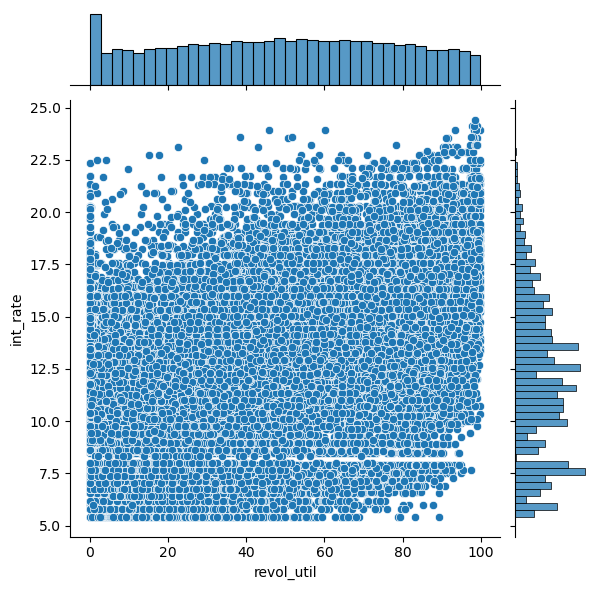

In [754]:
sns.jointplot(x='revol_util', y='int_rate', data=loan_master_data)
plt.show()

### revol_util vs Grade

<Figure size 2000x500 with 0 Axes>

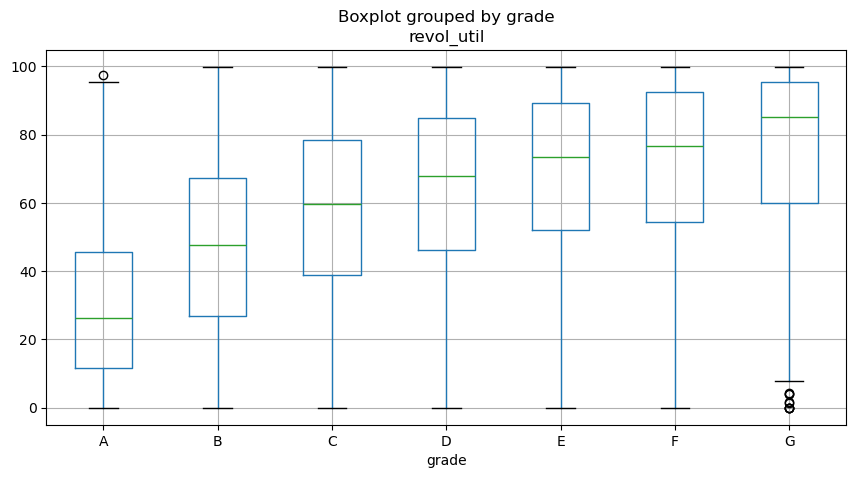

In [755]:
plt.figure(figsize=(20,5))
loan_master_data.boxplot(column='revol_util', by='grade',figsize=(10,5))
plt.show()

In [756]:
for col in loan_master_data.columns:
    if loan_master_data[col].dtype == 'object':
        print(col, loan_master_data[col].unique())

grade ['C' 'A' 'E' 'B' 'D' 'F' 'G']
sub_grade ['C4' 'C1' 'A4' 'C5' 'E1' 'B5' 'C3' 'B1' 'B2' 'D1' 'A1' 'B3' 'B4' 'D2'
 'A5' 'A3' 'A2' 'E4' 'D3' 'C2' 'F2' 'D4' 'F3' 'E3' 'F1' 'D5' 'E5' 'G4'
 'E2' 'G2' 'G1' 'F5' 'F4' 'G5' 'G3']
emp_title ['Ryder' 'AIR RESOURCES BOARD' 'Veolia Transportaton' ... 'E.E. Wine Inc'
 'ARIN' 'Fairfield Manufacturing']
home_ownership ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
verification_status ['Source Verified' 'Not Verified' 'Verified']
loan_status ['Charged Off' 'Fully Paid']
purpose ['car' 'other' 'wedding' 'debt_consolidation' 'credit_card'
 'home_improvement' 'major_purchase' 'medical' 'moving' 'small_business'
 'vacation' 'house' 'renewable_energy' 'educational']
addr_state ['GA' 'CA' 'AZ' 'NC' 'TX' 'VA' 'IL' 'MO' 'CT' 'UT' 'FL' 'PA' 'MN' 'NJ'
 'OR' 'KY' 'OH' 'SC' 'RI' 'LA' 'MA' 'NY' 'WA' 'WI' 'AL' 'NV' 'AK' 'CO'
 'MD' 'WV' 'VT' 'MI' 'DC' 'NH' 'AR' 'NM' 'KS' 'HI' 'OK' 'MT' 'WY' 'SD'
 'DE' 'MS' 'TN' 'IA' 'NE' 'ID' 'IN']


<Axes: >

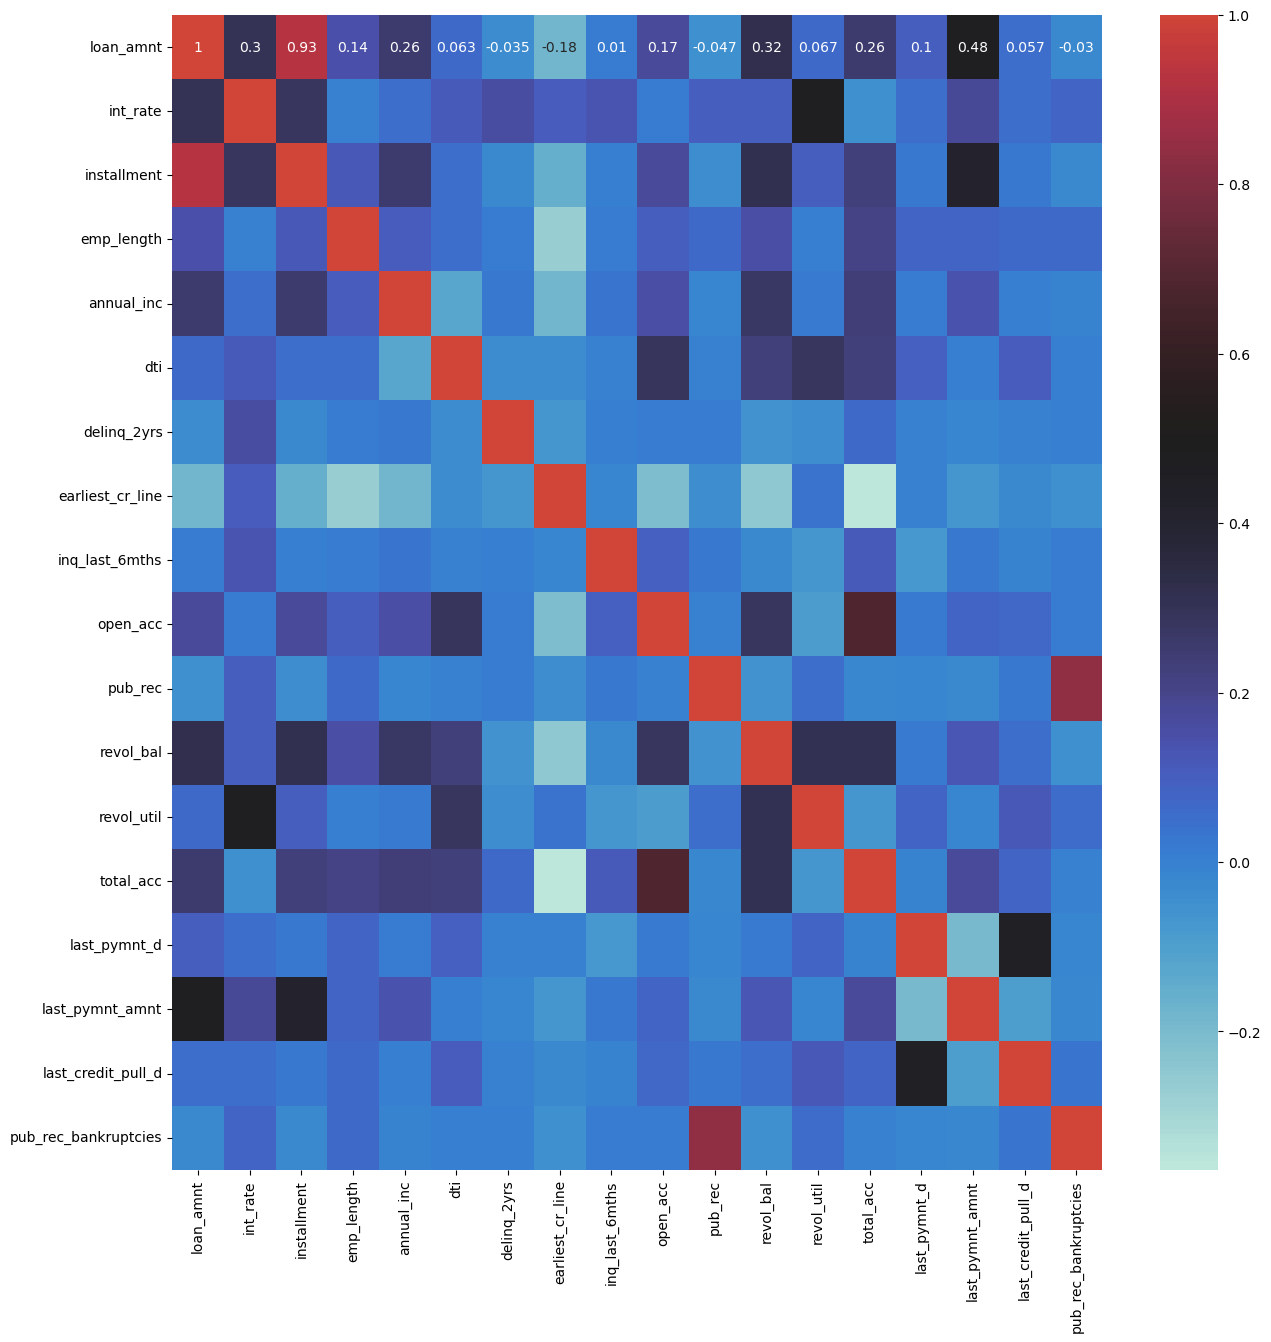

In [757]:
plt.figure(figsize=(15,15))
cont_var= ['loan_amnt', 'int_rate', 'installment',
       'emp_length', 'annual_inc',
       'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies']
corr = loan_master_data[cont_var].corr()
sns.heatmap(corr, annot=True, center=0.5)

Observation:

- loan_amnt is correlated to last_payment_amount with r factor.44, as expected
- int_rate is correlated to revol_util with r factor of .47 - This is good, as company is charging higher interest from riskier loan.
- loan_amnt revol_bal are correlated with r factor .35 - This is not good as it suggests that higher loan amount is being approved to riskier borrowers.
- delinq_2yrs is totally un-correlated with public record of bankruptcy. Therefore they represent distinct features with individual predictive value.

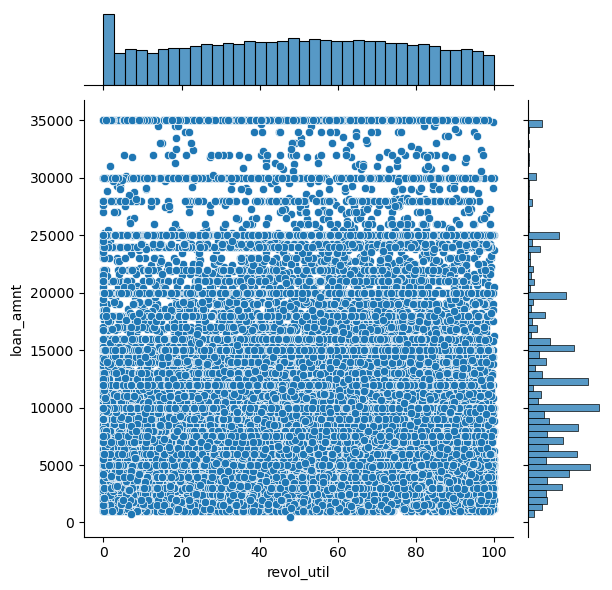

In [758]:
sns.jointplot(x='revol_util', y='loan_amnt', data=loan_master_data)
plt.show()

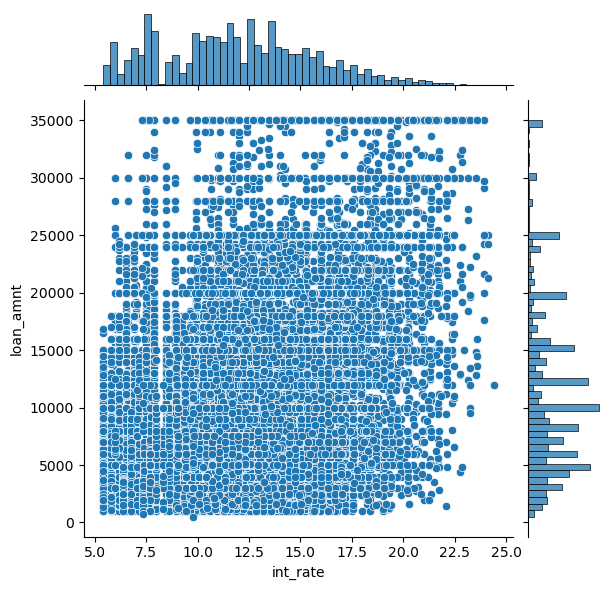

In [759]:
sns.jointplot(x='int_rate', y='loan_amnt', data=loan_master_data)
plt.show()

### dti vs open_acc

In [760]:
# Create derived variable 
loan_master_data['dti_bin'] = pd.cut(loan_master_data['dti'], [0,5,10,15,20,25,30], labels=['0-5','5-10','10-15','15-20','20-25','25-30'])

loan_master_data['dti_bin']
loan_master_data.groupby('dti_bin').int_rate.mean()

dti_bin
0-5      11.094313
5-10     11.589604
10-15    12.042336
15-20    12.406458
20-25    12.650751
25-30     9.624904
Name: int_rate, dtype: float64

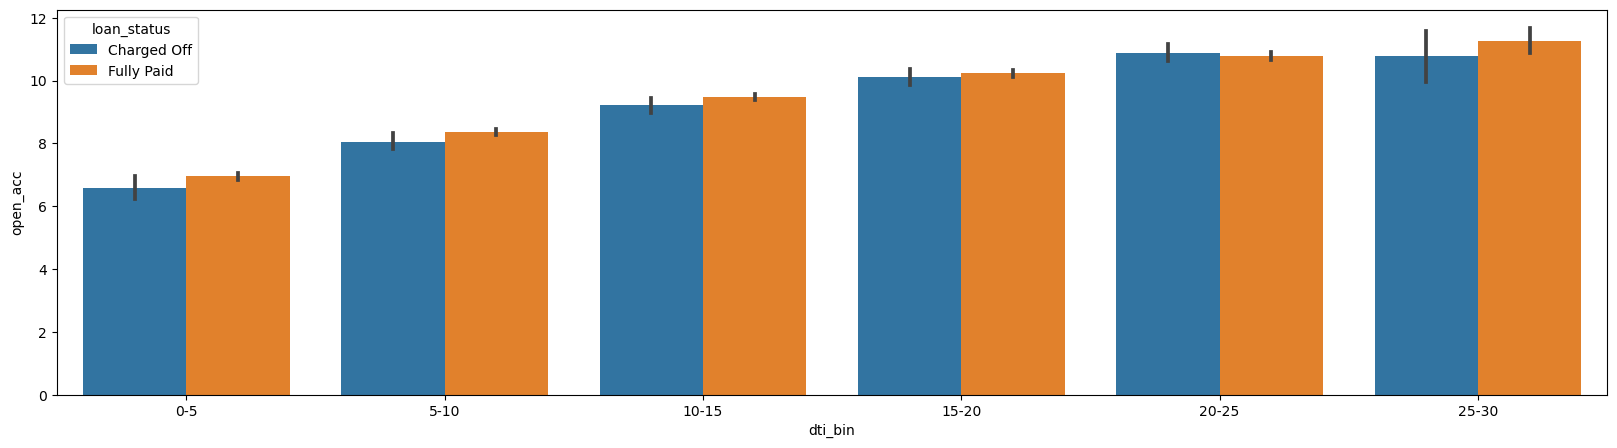

In [761]:
plt.figure(figsize=(20,5))
sns.barplot(x='dti_bin', y='open_acc', hue='loan_status',data=loan_master_data, estimator=np.mean)
plt.show()

Observation:

- The dti increses with the number of open credit line in borrowers credit file.

### delinq_2yr VS loan amount VS grade

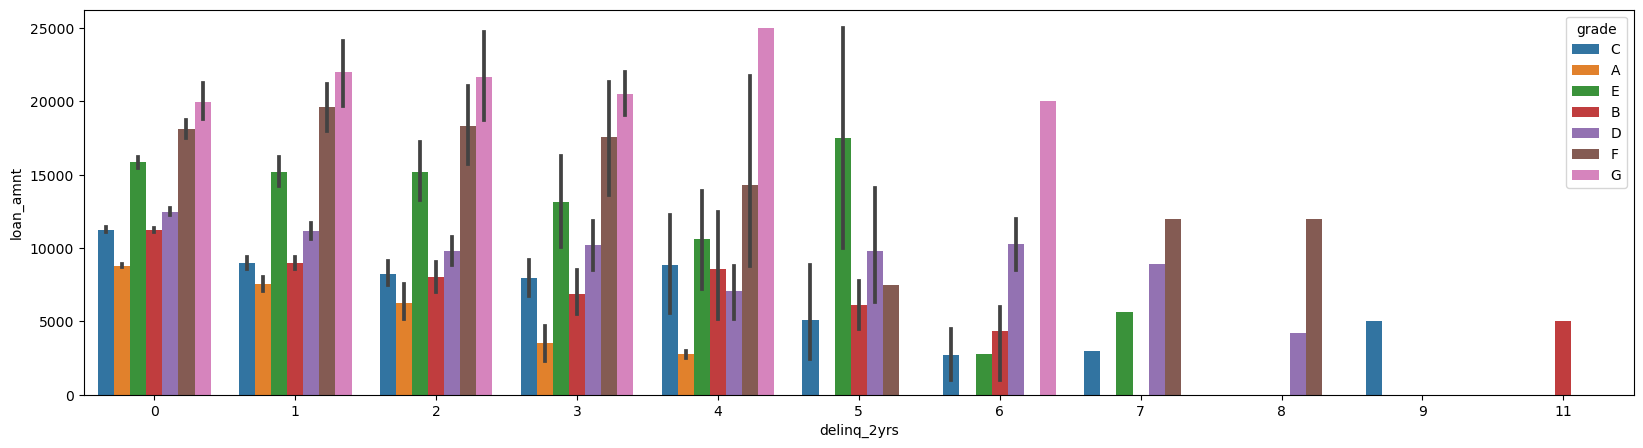

In [762]:
plt.figure(figsize=(20,5))
sns.barplot(x='delinq_2yrs', y='loan_amnt', hue='grade',data=loan_master_data, estimator=np.mean)
plt.show()

Observation:

- Not many loans receive invstment with higher number of delinquencies(>3). Despite the low loan amount request, these loans are considered risky and are not invested much in.
- Lending club should further restrict their investment. We see loan amounts of >15000 on average for people having >=2 delinquencies.

### delinq_2yr VS int_rate VS loan_status

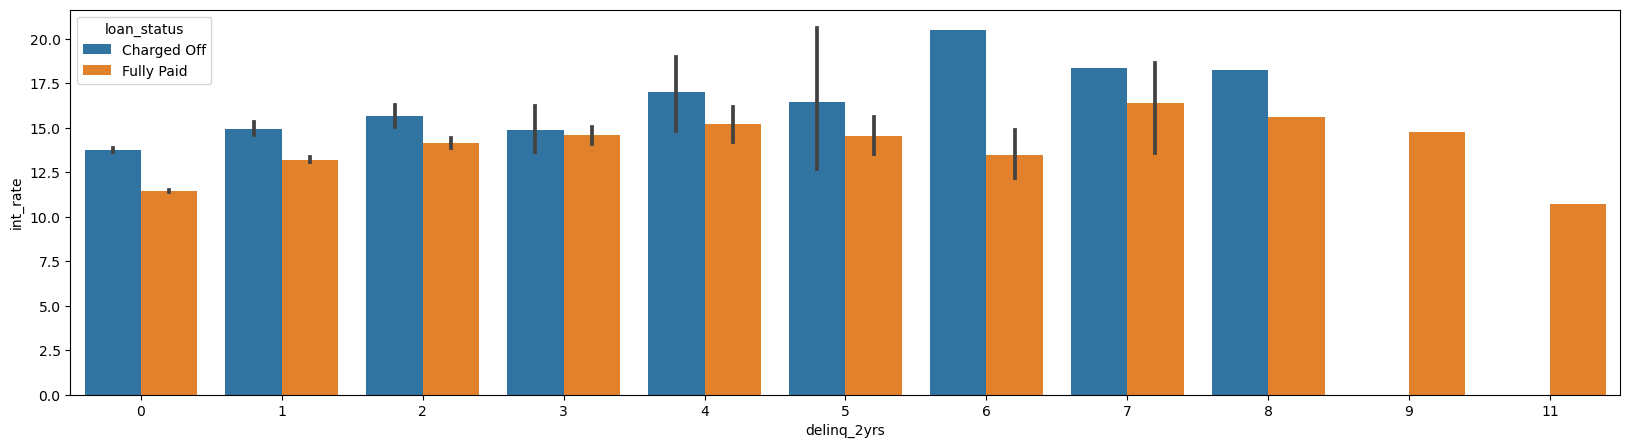

In [763]:
plt.figure(figsize=(20,5))
sns.barplot(x='delinq_2yrs', y='int_rate', hue='loan_status',data=loan_master_data, estimator=np.mean)
plt.show()

Observation:

In genral, intrest rate offered inceases with the number of deliquency of the borrower.

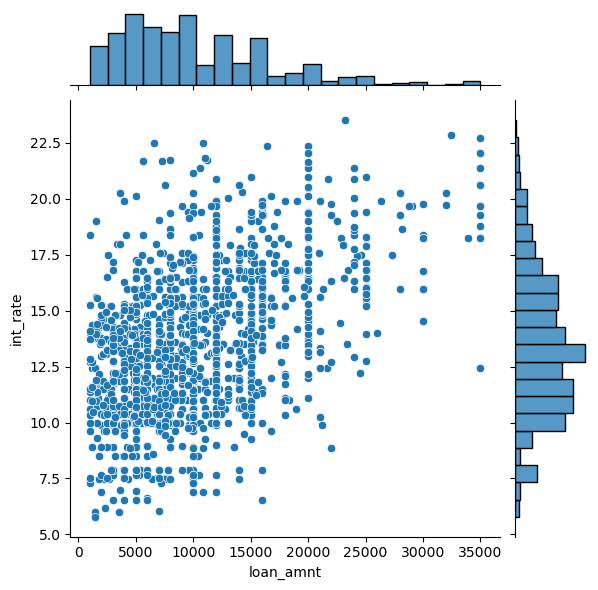

In [764]:
filtered_data = loan_master_data.loc[loan_master_data.pub_rec_bankruptcies > 0]
sns.jointplot(x='loan_amnt', y='int_rate', data=filtered_data)
plt.show()

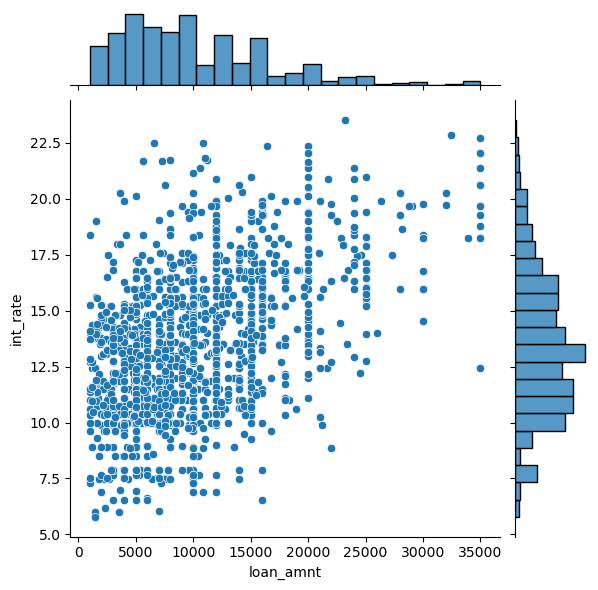

In [765]:
filtered_data = loan_master_data.loc[loan_master_data.pub_rec_bankruptcies > 0]
sns.jointplot(x='loan_amnt', y='int_rate', data=filtered_data)
plt.show()

In [766]:
loan_master_data[['pub_rec', 'pub_rec_bankruptcies']].corr()

,pub_rec,pub_rec_bankruptcies
pub_rec,1.000000,0.839795
pub_rec_bankruptcies,0.839795,1.000000


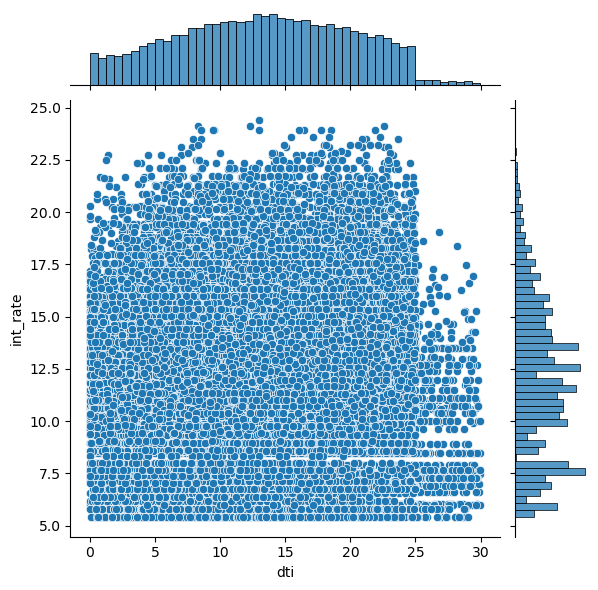

In [767]:
sns.jointplot(x='dti', y='int_rate', data=loan_master_data)